In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
import xgboost as xgb


from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Edu
#Edu
df_item_price = pd.read_csv("/content/drive/MyDrive/data_dsmarket/item_prices.csv")
df_item_sales = pd.read_csv('/content/drive/MyDrive/data_dsmarket/item_sales.csv')
df_calendar = pd.read_csv('//content/drive/MyDrive/data_dsmarket/daily_calendar_with_events.csv')

In [ ]:
#Franki
df_item_price = pd.read_csv("/content/drive/MyDrive/TFM Nuclio DS/data_dsmarket/item_prices.csv")
df_item_sales = pd.read_csv('/content/drive/MyDrive/TFM Nuclio DS/data_dsmarket/item_sales.csv')
df_calendar = pd.read_csv('/content/drive/MyDrive/TFM Nuclio DS/data_dsmarket/daily_calendar_with_events.csv')

#Data understanding

##Dataset size

In [ ]:
df_item_price.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Columns: 5 entries, item to sell_price
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [ ]:
df_item_sales.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [ ]:
df_calendar.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Columns: 5 entries, date to event
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [ ]:
df_item_price.head().T

,0,1,2,3,4
item,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001,ACCESORIES_1_001
category,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES
store_code,NYC_1,NYC_1,NYC_1,NYC_1,NYC_1
yearweek,201328.0,201329.0,201330.0,201331.0,201332.0
sell_price,12.7414,12.7414,10.9858,10.9858,10.9858


In [ ]:
df_item_sales

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
df_calendar

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN


In [ ]:
items = df_item_sales['item'].unique()
items

array(['ACCESORIES_1_001', 'ACCESORIES_1_002', 'ACCESORIES_1_003', ...,
       'SUPERMARKET_3_825', 'SUPERMARKET_3_826', 'SUPERMARKET_3_827'],
      dtype=object)

In [ ]:
categorys = df_item_sales['category'].unique()
categorys

array(['ACCESORIES', 'HOME_&_GARDEN', 'SUPERMARKET'], dtype=object)

In [ ]:
stores = df_item_sales['store'].unique()
stores

array(['Greenwich_Village', 'Harlem', 'Tribeca', 'Brooklyn', 'South_End',
       'Roxbury', 'Back_Bay', 'Midtown_Village', 'Yorktown',
       'Queen_Village'], dtype=object)

In [ ]:
department = df_item_sales['department'].unique()
department

array(['ACCESORIES_1', 'ACCESORIES_2', 'HOME_&_GARDEN_1',
       'HOME_&_GARDEN_2', 'SUPERMARKET_1', 'SUPERMARKET_2',
       'SUPERMARKET_3'], dtype=object)

In [ ]:
regions = df_item_sales['region'].unique()
regions

array(['New York', 'Boston', 'Philadelphia'], dtype=object)

In [ ]:
day_columns = df_item_sales.select_dtypes(include=np.number).columns.tolist()
#day_columns

#Exploracion de las variables

Recordar los clastering tienen que ser uno para los productos y otro para las tiendas. 
Tratar de agrupar variables con ese fin.

Lo que se podria hacer a la hora de explorar las variabeles a nivel general es ver la cantidad de ventas por item por categoria por tienda por region por dia/semana/mes. 

Por otro lado se podria ver la cantidad de ventas y los ingresos por tienda por mes. El categoria de vendidos por tienda, horarios y fechas de venta por tienda.Tener en cuenta la region de la tienda

Y variables parecidas para los ptoductos, cant y lugar de compras por mes, fechas y dias de ventas, frecuencia de compra. Tener en cuenta la categoria del producto

In [ ]:
df_item_sales

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
verntas_p_categoria_p_tienda = df_item_sales.groupby(['store','category'])

In [ ]:
verntas_p_categoria_p_tienda.sum().T.describe()

store        Back_Bay                                Brooklyn                \
category   ACCESORIES HOME_&_GARDEN  SUPERMARKET   ACCESORIES HOME_&_GARDEN   
count     1913.000000   1913.000000  1913.000000  1913.000000   1913.000000   
mean       275.618400    731.303711  2176.209096   295.062729    376.265551   
std         89.561687    241.357764   435.852596    86.466129    107.355247   
min          0.000000      0.000000     1.000000     0.000000      0.000000   
25%        208.000000    544.000000  1890.000000   230.000000    290.000000   
50%        261.000000    731.000000  2147.000000   292.000000    384.000000   
75%        338.000000    900.000000  2468.000000   352.000000    451.000000   
max        604.000000   1470.000000  5104.000000   655.000000    762.000000   

store                 Greenwich_Village                             \
category  SUPERMARKET        ACCESORIES HOME_&_GARDEN  SUPERMARKET   
count     1913.000000       1913.000000   1913.000000  1913.000000   
mean      1473.823837        458.273915    753.115525  2812.769472   
std        285.476992        123.835202    259.856733   700.751677   
min          0.000000          0.000000      0.000000     0.000000   
25%       1310.000000        373.000000    562.000000  2323.000000   
50%       1481.000000        459.000000    729.000000  2710.000000   
75%       1659.000000        537.000000    898.000000  3265.000000   
max       2420.000000        953.000000   1665.000000  5016.000000   

store          Harlem  ...      Roxbury    South_End                \
category   ACCESORIES  ...  SUPERMARKET   ACCESORIES HOME_&_GARDEN   
count     1913.000000  ...  1913.000000  1913.000000   1913.000000   
mean       333.404600  ...  2621.601673   224.299007    725.561422   
std         99.560947  ...   575.263884    66.985038    223.860386   
min          0.000000  ...     0.000000     0.000000      0.000000   
25%        263.000000  ...  2223.000000   178.000000    569.000000   
50%        320.000000  ...  2535.000000   218.000000    715.000000   
75%        389.000000  ...  2981.000000   266.000000    868.000000   
max        726.000000  ...  5251.000000   589.000000   1412.000000   

store                      Tribeca                                Yorktown  \
category  SUPERMARKET   ACCESORIES HOME_&_GARDEN  SUPERMARKET   ACCESORIES   
count     1913.000000  1913.000000   1913.000000  1913.000000  1913.000000   
mean      1975.017773   502.324621   1417.377418  3928.797700   193.525353   
std        415.075958   128.286012    413.023787   804.148661    70.705682   
min          0.000000     0.000000      0.000000     0.000000     0.000000   
25%       1679.000000   412.000000   1105.000000  3399.000000   140.000000   
50%       1919.000000   497.000000   1435.000000  3861.000000   190.000000   
75%       2235.000000   585.000000   1683.000000  4466.000000   241.000000   
max       3978.000000   956.000000   2724.000000  6488.000000   487.000000   

store                                
category HOME_&_GARDEN  SUPERMARKET  
count      1913.000000  1913.000000  
mean        734.769472  2492.516466  
std         312.976278   987.821041  
min           0.000000     0.000000  
25%         480.000000  1680.000000  
50%         738.000000  2460.000000  
75%         931.000000  3217.000000  
max        2047.000000  5902.000000  

[8 rows x 30 columns]

In [ ]:
#le count es 1913, la cantidad de dias registrados. Y las distintas metricas son con respecto a la cantidad de ventas por categoria por tienda.

#Acoplar calendar y seals

In [ ]:
#la idea es hacer un merge de el calendario con las ventas diarias hechas en cada tienda. 
#agrupar el dataset de seals por tienda y a esto juntarlo con el calendario y ahi poder hacer una linea temporal con la cantidad de ventas, 
#o incluso con este nuevo set poder agruparlo por semana mes año con un resample... 
#esto despues se puede hacer con las categorias o las agrupaciones que se quiera..
#distribucion de ventas en el año. De una categoria o producto, por tienda, por region o incluso en general y ver ese comportamiento.

Analizar la distribucion temporal de las ventas

In [ ]:
df_calendar_1 = df_calendar.set_index('d')
fechas_ventas_por_atributo = df_calendar['d']
fechas_ventas_por_atributo = pd.DataFrame(fechas_ventas_por_atributo).set_index('d', inplace=True)

def calendario_de_ventas_por_atributo (df, atributo, unidad): 
  #el atributo seria la columna y la unidad que valor de la columna por el que se quuiere hacer el estudio                                       
  uni = df.groupby(atributo).get_group(unidad)
  uni = uni.select_dtypes(include=np.number).T
  uni.index.names = ['d']

  time_serie = pd.merge (
                         left = df_calendar_1,
                         right = uni,
                         how = 'left',
                         on = 'd'
                         )
  
  return time_serie


In [ ]:
time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'store', 'Queen_Village')
time_serie #checked

,date,weekday,weekday_int,event,27441,27442,27443,27444,27445,27446,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d,,,,,,,,,,,,,,,,,,,,,
d_1,2011-01-29,Saturday,1,NaN,0,0,0,4,0,0,...,0,14,1,0,4,0,0,0,0,0
d_2,2011-01-30,Sunday,2,NaN,0,0,0,3,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,2011-01-31,Monday,3,NaN,0,0,0,0,0,0,...,0,5,1,0,2,2,0,0,0,0
d_4,2011-02-01,Tuesday,4,NaN,0,0,0,6,0,0,...,0,6,1,0,5,2,0,2,0,0
d_5,2011-02-02,Wednesday,5,NaN,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,2016-04-20,Wednesday,5,NaN,0,0,0,1,0,2,...,4,1,1,0,0,0,0,1,1,0
d_1910,2016-04-21,Thursday,6,NaN,0,0,0,0,1,0,...,2,3,3,0,2,1,0,0,0,0
d_1911,2016-04-22,Friday,7,NaN,0,0,0,0,0,1,...,0,1,6,0,3,0,0,0,3,0


In [ ]:
#
calendar_total_ventas_por_dia_por_tienda = df_calendar.set_index('d')

for i in stores:
  time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'store', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_total_ventas_por_dia_por_tienda[i] = resultado

  #aca hago la suma ventas por dia por tienda.
  #si a esto lo hacemos para un data set de un groupby por 'item' o 'category' tenems 
  #la distribucion de ventas en el tiempo de esa categoria en cada tienda

<ipython-input-23-2bf8b2a8224f>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-23-2bf8b2a8224f>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-23-2bf8b2a8224f>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-23-2bf8b2a8224f>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future versio

In [ ]:
calendar_total_ventas_por_dia_por_tienda # SIIIIIIIIIII !!!

,date,weekday,weekday_int,event,Greenwich_Village,Harlem,Tribeca,Brooklyn,South_End,Roxbury,Back_Bay,Midtown_Village,Yorktown,Queen_Village
d,,,,,,,,,,,,,,
d_1,2011-01-29,Saturday,1,NaN,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
d_2,2011-01-30,Sunday,2,NaN,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
d_3,2011-01-31,Monday,3,NaN,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
d_4,2011-02-01,Tuesday,4,NaN,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
d_5,2011-02-02,Wednesday,5,NaN,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,2016-04-20,Wednesday,5,NaN,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159
d_1910,2016-04-21,Thursday,6,NaN,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226
d_1911,2016-04-22,Friday,7,NaN,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828


#Estudias especificos

Se puede hacer, 

Distribucion anual de ventas por categoria. 

Distrubucion anual de ventas por tienda. Si es regular hacer semanal

Distribucion anual de ventas por categoria en cada region

Distribucion anual de ventas por categoria en cada tienda


La idea es considerar que las categorias tienen un periodo semanal y/o anual.


Una vez tengo la distribucion anual o semanal del item/categoria podria considerar que se cumple en todas las tiendas/regiones por igual? mas alla del volumen de ventas de cada lugar..


Las tiendas tengrian un periodo anual de volumen de ventas?


(se podria ver si el comportamiento de la categoria es similar al de los productos de la categoria, y si el comportamiento de la region es similar al de las tiendas de la region. Y si es similar directamente trabajar con categorias y con regiones para facilitar los estudios con esta generalizacion)

tambien podria hacer una agrupacion por dia de la semana (que es una variable) y ahi hacer un promendio y dsp graficarlo y analizarlo....

###Distribucion de cada categoria por region

<ipython-input-165-d96dd76fa19e>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-165-d96dd76fa19e>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-165-d96dd76fa19e>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


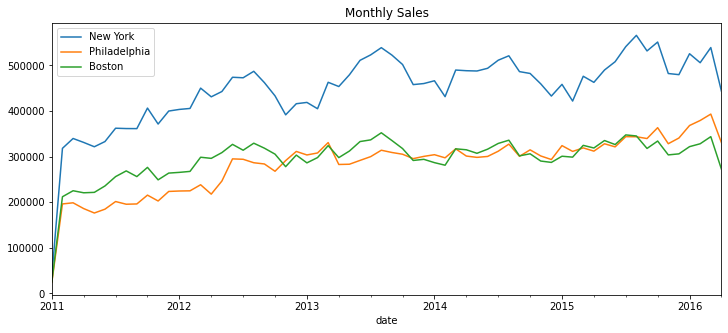

In [ ]:
#ventas totales por dia en cada region

calendar_tot_ventas_p_categoria_p_d_p_region = df_calendar.set_index('d')

for i in regions:

  time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'region', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_tot_ventas_p_categoria_p_d_p_region[i] = resultado


calendar_tot_ventas_p_categoria_p_d_p_region['date'] = pd.to_datetime(calendar_tot_ventas_p_categoria_p_d_p_region['date'])
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["New York"].sum().plot(figsize = (12, 5), title = "Weekly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Philadelphia"].sum().plot(figsize = (12, 5), title = "Monthly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Boston"].sum().plot(figsize = (12, 5), title = "Monthly Sales");
plt.legend()

In [ ]:
gb_categorias = df_item_sales.groupby('category')

<ipython-input-167-a7b6befdd85c>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-167-a7b6befdd85c>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-167-a7b6befdd85c>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


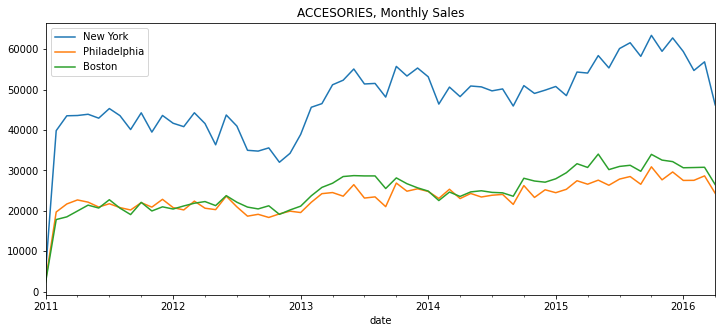

In [ ]:
gb_categoria = gb_categorias.get_group('ACCESORIES') #'ACCESORIES', 'HOME_&_GARDEN', 'SUPERMARKET' 

calendar_tot_ventas_p_categoria_p_d_p_region = df_calendar.set_index('d')

for i in regions:

  time_serie = calendario_de_ventas_por_atributo(gb_categoria, 'region', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_tot_ventas_p_categoria_p_d_p_region[i] = resultado


calendar_tot_ventas_p_categoria_p_d_p_region['date'] = pd.to_datetime(calendar_tot_ventas_p_categoria_p_d_p_region['date'])
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["New York"].sum().plot(figsize = (12, 5), title = "ACCESORIES, Weekly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Philadelphia"].sum().plot(figsize = (12, 5), title = "ACCESORIES, Monthly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Boston"].sum().plot(figsize = (12, 5), title = "ACCESORIES, Monthly Sales");
plt.legend()

In [ ]:
#habria que achicar el periodo de tiempo, el eje x. para poder hacer el analisis por semana.. 

<ipython-input-169-fb05d502ea86>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-169-fb05d502ea86>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-169-fb05d502ea86>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


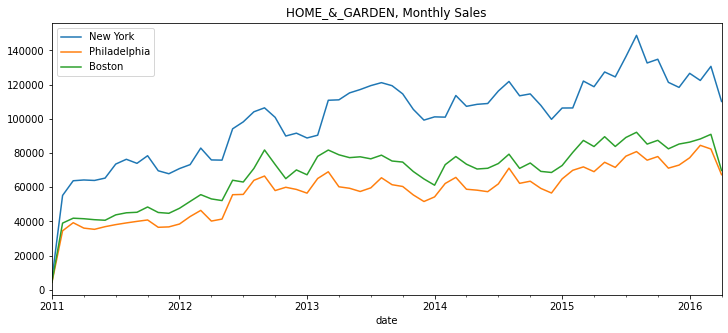

In [ ]:
gb_categoria = gb_categorias.get_group('HOME_&_GARDEN') #'ACCESORIES', 'HOME_&_GARDEN', 'SUPERMARKET'
calendar_tot_ventas_p_categoria_p_d_p_region = df_calendar.set_index('d')
for i in regions:

  time_serie = calendario_de_ventas_por_atributo(gb_categoria, 'region', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_tot_ventas_p_categoria_p_d_p_region[i] = resultado


calendar_tot_ventas_p_categoria_p_d_p_region['date'] = pd.to_datetime(calendar_tot_ventas_p_categoria_p_d_p_region['date'])
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["New York"].sum().plot(figsize = (12, 5), title = "HOME_&_GARDEN, Weekly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Philadelphia"].sum().plot(figsize = (12, 5), title = "HOME_&_GARDEN, Monthly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Boston"].sum().plot(figsize = (12, 5), title = "HOME_&_GARDEN, Monthly Sales");
plt.legend()

<ipython-input-170-3c4145353b7c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-170-3c4145353b7c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-170-3c4145353b7c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)


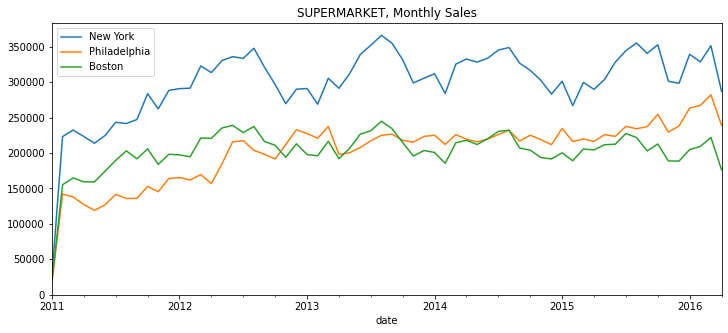

In [ ]:
gb_categoria = gb_categorias.get_group('SUPERMARKET') #'ACCESORIES', 'HOME_&_GARDEN', 'SUPERMARKET'
calendar_tot_ventas_p_categoria_p_d_p_region = df_calendar.set_index('d')
for i in regions:

  time_serie = calendario_de_ventas_por_atributo(gb_categoria, 'region', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_tot_ventas_p_categoria_p_d_p_region[i] = resultado


calendar_tot_ventas_p_categoria_p_d_p_region['date'] = pd.to_datetime(calendar_tot_ventas_p_categoria_p_d_p_region['date'])
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["New York"].sum().plot(figsize = (12, 5), title = "SUPERMARKET, Weekly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Philadelphia"].sum().plot(figsize = (12, 5), title = "SUPERMARKET, Monthly Sales");
calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["Boston"].sum().plot(figsize = (12, 5), title = "SUPERMARKET, Monthly Sales");
plt.legend()

In [ ]:
W_NY = calendar_tot_ventas_p_categoria_p_d_p_region.set_index("date").resample("M")["New York"]

In [ ]:
W_NY 
#hay manera de axceder a las series de el groupby generado por el resample? 
#y asi poder graficar cada semana y ver el comportamiento en el timpo, o cada mes.. o cada año..
#(reducir el periodo en estudio)

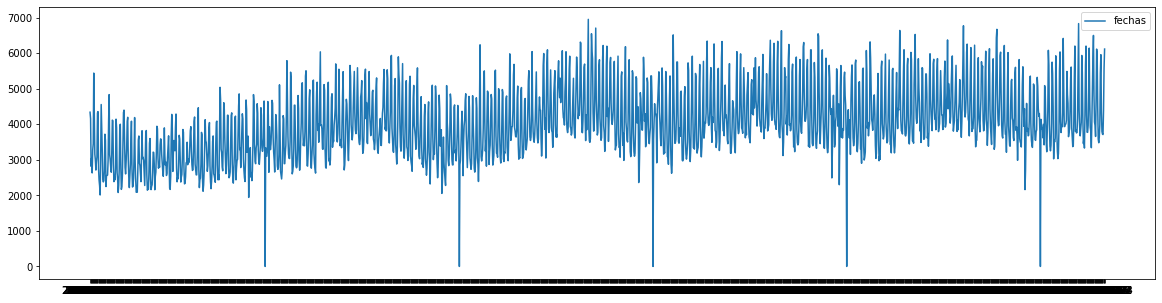

In [ ]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot()

x = calendar_total_ventas_por_dia_por_tienda["date"]
y = calendar_total_ventas_por_dia_por_tienda["Greenwich_Village"]
#y_mean = ts_lynx["y_mean"]

ax.plot(x, y, label = "fechas")
#ax.plot(x, y_mean, label = "ventas por dia en la tienda")

plt.legend();

#Distribucion geografica de ventas 

Ver la distribucion en las tiendas o regiones por items o categorias

In [ ]:
ventas_por_categoria_por_tienda = df_item_sales.groupby(['category','store'])
cant_ventas_por_categoria_por_tienda = ventas_por_categoria_por_tienda.get_group(('ACCESORIES','Queen_Village'))
cant_ventas_por_categoria_por_tienda

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
27441,ACCESORIES_1_001_PHI_3,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27442,ACCESORIES_1_002_PHI_3,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,1,0,0,1,0,0,0,0,0
27443,ACCESORIES_1_003_PHI_3,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27444,ACCESORIES_1_004_PHI_3,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Queen_Village,PHI_3,Philadelphia,4,3,0,...,2,0,3,1,0,1,0,0,1,2
27445,ACCESORIES_1_005_PHI_3,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28001,ACCESORIES_2_145_PHI_3,ACCESORIES_2_145,ACCESORIES,ACCESORIES_2,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,4,0,0,0
28002,ACCESORIES_2_146_PHI_3,ACCESORIES_2_146,ACCESORIES,ACCESORIES_2,Queen_Village,PHI_3,Philadelphia,0,2,0,...,0,0,0,0,0,0,0,0,0,0
28003,ACCESORIES_2_147_PHI_3,ACCESORIES_2_147,ACCESORIES,ACCESORIES_2,Queen_Village,PHI_3,Philadelphia,0,0,0,...,1,0,0,0,0,2,0,1,2,0
28004,ACCESORIES_2_148_PHI_3,ACCESORIES_2_148,ACCESORIES,ACCESORIES_2,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def cant_ventas_porX_porY (X, Y): 
                              # X puede ser la categoria o el item, y la Y puede ser la tienda o la region
                              #lo que hace la funcion es la suma total de ventas de X en Y (en todo el periodo de tiempo)
  ventas_por_categoria_por_tienda = df_item_sales.groupby([X,Y])
  x=df_item_sales[X].unique()
  y=df_item_sales[Y].unique()
  cant_ventas_por_categoria_por_tienda=pd.DataFrame(x)
  
  for i in y:
    ventas_i=[]
    for j in x:

      ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
      ventas_i.append(ventas_j_i)

    cant_ventas_por_categoria_por_tienda[i]=ventas_i


  return cant_ventas_por_categoria_por_tienda

#a esta funcion se le podria cambier el 'sum' por otr calculo si se quiere calcular otra cosa

In [ ]:
cant_ventas_porX_porY('category', 'region')  #EXCELENTE !!!!!!

<ipython-input-175-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-175-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-175-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean(

,0,New York,Boston,Philadelphia
0,ACCESORIES,1345.080973,939.433038,880.576991
1,HOME_&_GARDEN,1537.574499,1384.987584,1175.123209
2,SUPERMARKET,3339.648921,3005.432846,3000.977963


In [ ]:
vent_cat_p_tienda = cant_ventas_porX_porY('category', 'store')

<ipython-input-175-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-175-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-175-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean(

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1376.03629417, 1612.88137735, 1849.72646053, 2086.57154371,
        2323.41662689, 2560.26171007, 2797.10679324, 3033.95187642,
        3270.7969596 , 3507.64204278, 3744.48712596]),
 <BarContainer object of 10 artists>)

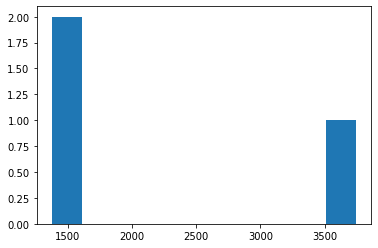

In [ ]:
plt.hist(vent_cat_p_tienda['Greenwich_Village']) # acomodar la escala del eje x

In [ ]:
cant_ventas_porX_porY('category', 'store') #quiero convertir cada celda en el porcentaje que significa para cada fila.
                                          #osea, de la cantidad de ventas por tienda, que porcentaje corresponde a cada categoria.

In [ ]:
max_ventas_por_categoria_por_tienda=pd.DataFrame(categorys)
for i in stores:
    ventas_i=[]
    for j in categorys:

      ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).max(axis=1).max()
      ventas_i.append(ventas_j_i)

    max_ventas_por_categoria_por_tienda[i]=ventas_i

max_ventas_por_categoria_por_tienda

#ejemplo de calculo de maximo de ventas por dia de una categoria en una tienda. ('max' en vez de 'sum')

<ipython-input-181-5b0c0a53e988>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).max(axis=1).max()
<ipython-input-181-5b0c0a53e988>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).max(axis=1).max()
<ipython-input-181-5b0c0a53e988>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).max(axis=1).max()
<ipy

,0,Greenwich_Village,Harlem,Tribeca,Brooklyn,South_End,Roxbury,Back_Bay,Midtown_Village,Yorktown,Queen_Village
0,ACCESORIES,294,97,258,160,183,135,148,94,96,259
1,HOME_&_GARDEN,239,119,128,300,601,626,120,58,95,67
2,SUPERMARKET,648,227,763,156,634,412,385,224,300,374


In [ ]:
df_item_sales['d_1'].describe()

count    30490.000000
mean         1.070220
std          5.126689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        360.000000
Name: d_1, dtype: float64

# Clustering (items y tiendas)

##Dataset items

In [ ]:
def cant_ventas_porX_porY (X, Y): 
                              # X puede ser la categoria o el item, y la Y puede ser la tienda o la region
                              #lo que hace la funcion es la suma total de ventas de X en Y (en todo el periodo de tiempo)
  ventas_por_categoria_por_tienda = df_item_sales.groupby([X,Y])
  x=df_item_sales[X].unique()
  y=df_item_sales[Y].unique()
  cant_ventas_por_categoria_por_tienda=pd.DataFrame(x)
  
  for i in y:
    ventas_i=[]
    for j in x:

      ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
      ventas_i.append(ventas_j_i)

    cant_ventas_por_categoria_por_tienda[i]=ventas_i


  return cant_ventas_por_categoria_por_tienda

#a esta funcion se le podria cambier el 'sum' por otr calculo si se quiere calcular otra cosa

In [ ]:
mean_ventas_p_item_p_tienda = cant_ventas_porX_porY('item', 'store') 

<ipython-input-136-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-136-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-136-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean(

In [ ]:
mean_ventas_p_item_p_tienda.rename(columns = {0: 'item'}, inplace=True)
mean_ventas_p_item_p_tienda #hacer pickle 

,item,Greenwich_Village,Harlem,Tribeca,Brooklyn,South_End,Roxbury,Back_Bay,Midtown_Village,Yorktown,Queen_Village
0,ACCESORIES_1_001,600.0,542.0,758.0,635.0,260.0,402.0,385.0,178.0,115.0,218.0
1,ACCESORIES_1_002,493.0,328.0,452.0,323.0,220.0,300.0,358.0,1143.0,780.0,662.0
2,ACCESORIES_1_003,288.0,145.0,137.0,161.0,99.0,101.0,178.0,176.0,107.0,43.0
3,ACCESORIES_1_004,3288.0,7503.0,10442.0,1588.0,2951.0,3570.0,3174.0,905.0,573.0,5181.0
4,ACCESORIES_1_005,1849.0,2039.0,2663.0,930.0,1124.0,2016.0,1002.0,1324.0,595.0,1079.0
...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,1098.0,3307.0,4805.0,1030.0,962.0,942.0,396.0,926.0,900.0,1022.0
3045,SUPERMARKET_3_824,1364.0,900.0,1563.0,630.0,547.0,796.0,419.0,619.0,767.0,720.0
3046,SUPERMARKET_3_825,1834.0,1208.0,1933.0,1221.0,714.0,1822.0,1201.0,758.0,1123.0,1712.0
3047,SUPERMARKET_3_826,1763.0,1026.0,1240.0,1839.0,898.0,993.0,1130.0,1450.0,1147.0,702.0


In [ ]:
mean_ventas_p_item_p_region = cant_ventas_porX_porY('item', 'region') 
mean_ventas_p_item_p_region.rename(columns = {0: 'item'}, inplace=True)

<ipython-input-136-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-136-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-136-ff5791c85aeb>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean(

In [ ]:
mean_ventas_p_item_p_tienda = mean_ventas_p_item_p_tienda.merge(mean_ventas_p_item_p_region, how='left', on= ['item'])

In [ ]:
calendar_total_ventas_por_dia_por_item = df_calendar.set_index('d')

for i in items:
  time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'item', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_total_ventas_por_dia_por_item[i] = resultado

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-141-97b9ab2da90e>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-141-97b9ab2da90e>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  calendar_total_ventas_por_dia_por_item[i] = resultado
<ipython-input-141-97b9ab2da90e>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipy

In [ ]:
def weekday_media(df):   #df tiene que tener la columna 'weekday'

  weekday_mean= df.groupby('weekday').mean().sort_values('weekday_int').T
  weekday_mean.drop('weekday_int', inplace=True)
  weekday_mean.reset_index(inplace=True)
  weekday_mean.sort_values(by=['index'], inplace=True)
  weekday_mean.rename(columns={'Saturday':'Saturday_seals_mean', 'Sunday':'Sunday_seals_mean',
                             'Monday':'Monday_seals_mean', 'Tuesday':'Tuesday_seals_mean',
                             'Wednesday':'Wednesday_seals_mean', 'Thursday':'Thursday_seals_mean',
                             'Friday':'Friday_seals_mean'}, inplace=True)
  return weekday_mean

In [ ]:
weekday_mean = weekday_media(calendar_total_ventas_por_dia_por_item)
weekday_mean.rename(columns={'index':'item'}, inplace=True)

In [ ]:
weekday_mean


weekday,item,Saturday_seals_mean,Sunday_seals_mean,Monday_seals_mean,Tuesday_seals_mean,Wednesday_seals_mean,Thursday_seals_mean,Friday_seals_mean
0,ACCESORIES_1_001,2.521898,2.448905,2.087912,2.076923,1.930403,1.758242,2.150183
1,ACCESORIES_1_002,3.321168,3.164234,2.329670,2.282051,2.197802,2.322344,2.890110
2,ACCESORIES_1_003,1.062044,0.923358,0.549451,0.593407,0.648352,0.630037,0.842491
3,ACCESORIES_1_004,24.481752,26.970803,19.901099,17.849817,17.622711,17.307692,19.175824
4,ACCESORIES_1_005,10.189781,8.970803,6.589744,6.278388,6.699634,7.069597,7.688645
...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,9.135036,10.437956,8.054945,7.267399,7.212454,6.739927,7.446886
3045,SUPERMARKET_3_824,5.149635,4.952555,4.769231,3.989011,3.879121,3.663004,4.054945
3046,SUPERMARKET_3_825,8.051095,9.127737,7.311355,6.673993,5.908425,6.076923,6.333333
3047,SUPERMARKET_3_826,6.718978,6.948905,6.095238,6.428571,6.043956,6.003663,6.355311


In [ ]:
weekday_mean.columns.tolist()

['item',
 'Saturday_seals_mean',
 'Sunday_seals_mean',
 'Monday_seals_mean',
 'Tuesday_seals_mean',
 'Wednesday_seals_mean',
 'Thursday_seals_mean',
 'Friday_seals_mean']

In [ ]:
weekday_mean['weekend_seals_mean'] = pd.DataFrame((weekday_mean['Saturday_seals_mean'] + weekday_mean['Sunday_seals_mean'])/2)
weekday_mean['weekdays_seals_mean'] = pd.DataFrame((weekday_mean['Monday_seals_mean'] + weekday_mean['Tuesday_seals_mean'] 
                              + weekday_mean['Wednesday_seals_mean'] + weekday_mean['Thursday_seals_mean']
                              + weekday_mean['Friday_seals_mean'])/5)

weekday_seals_means = weekday_mean

weekday_seals_means.drop(['Saturday_seals_mean',
                          'Sunday_seals_mean',
                          'Monday_seals_mean',
                          'Tuesday_seals_mean',
                          'Wednesday_seals_mean',
                          'Thursday_seals_mean',
                          'Friday_seals_mean'],
                          axis=1,
                          inplace=True)

#Aca hago, como nos dijo Matias, la divicion de las ventas por dia de semana y fin de semana para reducir variables y mejorar la explicabilidad

In [ ]:
weekday_seals_means

weekday,item,weekend_seals_mean,weekdays_seals_mean
0,ACCESORIES_1_001,2.485401,2.000733
1,ACCESORIES_1_002,3.242701,2.404396
2,ACCESORIES_1_003,0.992701,0.652747
3,ACCESORIES_1_004,25.726277,18.371429
4,ACCESORIES_1_005,9.580292,6.865201
...,...,...,...
3044,SUPERMARKET_3_823,9.786496,7.344322
3045,SUPERMARKET_3_824,5.051095,4.071062
3046,SUPERMARKET_3_825,8.589416,6.460806
3047,SUPERMARKET_3_826,6.833942,6.185348


In [ ]:
Items_clustering = mean_ventas_p_item_p_tienda.merge(weekday_seals_means,
                                  how='left',
                                  on='item')

In [ ]:
def month_mean (df):  #df tiene que tener la columna 'date'

  df['date'] = pd.to_datetime(df['date'])
  ca = df.set_index("date").resample("M").mean()
  gca = ca.groupby(ca.index.month)
  month_mean = gca.mean() #hago el promedio de de las ventas de cada mes por tienda. es el promedio del promedio, 
                          #primero promedio las ventas de cada mes de los 6 años y despues promendio cada mes por su cuenta, enero, febrero...
  return month_mean

In [ ]:
month_mean = month_mean(calendar_total_ventas_por_dia_por_item)

In [ ]:
month_mean_p_item = month_mean
month_mean_p_item.drop('weekday_int', axis=1, inplace=True)
month_mean_p_item = month_mean_p_item.T
month_mean_p_item.reset_index(inplace=True)
month_mean_p_item.sort_values('index', inplace=True)
month_mean_p_item.rename(columns={'index':'item', 1:'jen_mean', 2:'feb_mean', 3:'march_mean', 4:'apr_mean', 5:'may_mean', 6:'jun_mean',
                                   7:'jul_mean', 8:'agu_mean', 9:'sep_mean', 10:'oct_mean', 11:'nov_man', 12:'dic_mean'}, inplace=True)

month_mean_p_item

date,item,jen_mean,feb_mean,march_mean,apr_mean,may_mean,jun_mean,jul_mean,agu_mean,sep_mean,oct_mean,nov_man,dic_mean
0,ACCESORIES_1_001,2.016129,2.158867,2.258065,2.086111,1.400000,1.453333,2.122581,1.877419,2.206667,2.477419,2.740000,2.606452
1,ACCESORIES_1_002,1.677419,2.033662,1.973118,1.783333,1.929032,2.473333,2.696774,2.864516,2.873333,3.012903,2.753333,5.703226
2,ACCESORIES_1_003,0.537634,0.866790,0.935484,1.037500,0.632258,0.626667,0.658065,0.709677,0.706667,0.387097,0.500000,1.296774
3,ACCESORIES_1_004,20.672043,20.041051,20.080645,20.248611,21.419355,21.566667,18.703226,19.729032,19.873333,19.877419,21.113333,21.122581
4,ACCESORIES_1_005,7.462366,6.389368,5.451613,4.897222,6.070968,7.846667,7.716129,8.225806,8.273333,10.129032,9.593333,9.432258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,7.725806,10.005747,8.838710,6.886111,5.748387,6.073333,6.490323,9.245161,9.333333,7.941935,9.146667,9.490323
3045,SUPERMARKET_3_824,3.304659,3.998153,4.215054,5.162500,5.200000,6.560000,5.051613,4.574194,4.460000,4.251613,3.153333,2.754839
3046,SUPERMARKET_3_825,6.781362,9.701765,7.779570,7.709722,6.464516,6.293333,8.367742,7.516129,7.026667,5.903226,5.053333,6.161290
3047,SUPERMARKET_3_826,5.672043,5.406404,5.408602,7.398611,7.212903,8.253333,7.161290,6.393548,5.800000,5.619355,5.960000,5.580645


In [ ]:
month_mean_p_item['spring_month_mean'] = pd.DataFrame((month_mean_p_item['march_mean'] + 
                                                       month_mean_p_item['apr_mean'] + 
                                                       month_mean_p_item['may_mean'])/3)
month_mean_p_item['summer_month_mean'] = pd.DataFrame((month_mean_p_item['jun_mean'] + 
                                                       month_mean_p_item['jul_mean'] + 
                                                       month_mean_p_item['agu_mean'])/3)
month_mean_p_item['autumn_month_mean'] = pd.DataFrame((month_mean_p_item['sep_mean'] + 
                                                       month_mean_p_item['oct_mean'] +
                                                       month_mean_p_item['nov_man'])/3)
month_mean_p_item['winter_month_mean'] = pd.DataFrame((month_mean_p_item['dic_mean'] + 
                                                       month_mean_p_item['jen_mean'] + 
                                                       month_mean_p_item['feb_mean'])/3)                                                                                                                                                                     
                                          

season_mean_p_item = month_mean_p_item

season_mean_p_item.drop([ 'jen_mean',
                          'feb_mean',
                          'march_mean',
                          'apr_mean',
                          'may_mean',
                          'jun_mean',
                          'jul_mean',
                          'agu_mean',
                          'sep_mean',
                          'oct_mean',
                          'nov_man',
                          'dic_mean'],
                          axis=1,
                          inplace=True)

In [ ]:
Items_clustering = Items_clustering.merge(season_mean_p_item,
                                  how='left',
                                  on='item')

In [ ]:
sell_price = df_item_price.groupby('item').mean()
sell_price.drop('yearweek', axis=1, inplace=True)

In [ ]:
Items_clustering = Items_clustering.merge(sell_price,
                                  how='left',
                                  on='item')

In [ ]:
items_categorys = pd.DataFrame(df_item_sales.groupby('item').max()['category'])
items_categorys.reset_index(inplace=True)

Items_clustering = Items_clustering.merge(items_categorys,
                                  how='left',
                                  on='item')         

#La variable categoria se puede utilizar para desglosar el data set y hacer clusters para cada categoria

In [ ]:
Items_clustering_1 = Items_clustering.copy()

In [ ]:
dummy_dataset = pd.get_dummies(Items_clustering['category'], prefix = 'category')

In [ ]:
dummy_dataset

,category_ACCESORIES,category_HOME_&_GARDEN,category_SUPERMARKET
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3044,0,0,1
3045,0,0,1
3046,0,0,1
3047,0,0,1


In [ ]:
#Items_clustering.select_dtypes(include=np.number)
scaler = StandardScaler().fit_transform(Items_clustering.select_dtypes(include=np.number)) 

Items_clustering_S = pd.DataFrame(
    data = scaler, 
    index = Items_clustering.select_dtypes(include=np.number).index,
    columns = Items_clustering.select_dtypes(include=np.number).columns
)

In [ ]:
Items_clustering = pd.concat([Items_clustering['item'], Items_clustering_S], axis = 1)
Items_clustering = pd.concat([Items_clustering, dummy_dataset], axis = 1)

In [ ]:
Items_clustering.T

,0,1,2,3,4,5,6,7,8,9,...,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
item,ACCESORIES_1_001,ACCESORIES_1_002,ACCESORIES_1_003,ACCESORIES_1_004,ACCESORIES_1_005,ACCESORIES_1_006,ACCESORIES_1_007,ACCESORIES_1_008,ACCESORIES_1_009,ACCESORIES_1_010,...,SUPERMARKET_3_818,SUPERMARKET_3_819,SUPERMARKET_3_820,SUPERMARKET_3_821,SUPERMARKET_3_822,SUPERMARKET_3_823,SUPERMARKET_3_824,SUPERMARKET_3_825,SUPERMARKET_3_826,SUPERMARKET_3_827
New York,-0.366729,-0.416855,-0.463031,0.716179,-0.102702,-0.199163,-0.432016,2.036584,-0.061651,-0.272403,...,0.431653,0.411474,0.076982,-0.376285,0.903603,0.044579,-0.264129,-0.171298,-0.188807,-0.224733
Boston,-0.319482,-0.329963,-0.360972,0.216851,-0.127536,-0.253619,-0.342987,0.894338,-0.139815,-0.1418,...,0.197501,0.086179,0.09852,-0.28438,0.459032,-0.241773,-0.275139,-0.152653,-0.197058,-0.306644
Philadelphia,-0.442216,-0.27338,-0.457277,0.05827,-0.239759,-0.053583,-0.399641,1.101166,-0.201905,-0.200928,...,0.23948,0.622253,0.484432,-0.255796,0.997861,-0.25197,-0.312373,-0.191322,-0.215256,-0.082645
weekend_seals_mean,-0.390764,-0.364038,-0.443442,0.429428,-0.140378,-0.181852,-0.41311,1.2786,-0.127434,-0.205551,...,0.24048,0.345516,0.172088,-0.321341,0.861613,-0.133101,-0.300218,-0.175347,-0.2373,-0.216241
weekdays_seals_mean,-0.396062,-0.376895,-0.460068,0.381262,-0.165084,-0.196705,-0.421526,1.608645,-0.136038,-0.231873,...,0.364495,0.395733,0.219473,-0.34044,0.807284,-0.142335,-0.297758,-0.184286,-0.197366,-0.236952
spring_month_mean,-0.419898,-0.420794,-0.467796,0.434698,-0.256994,-0.188398,-0.442813,1.597337,-0.137417,-0.233356,...,0.245119,0.49946,0.158059,-0.341284,0.833967,-0.179882,-0.285106,-0.172548,-0.202055,-0.176682
summer_month_mean,-0.383715,-0.349951,-0.428958,0.329759,-0.143884,-0.172919,-0.401839,1.469794,-0.126859,-0.189392,...,0.200205,0.410325,0.161366,-0.316364,0.55283,-0.16978,-0.243331,-0.164961,-0.169788,-0.281455
autumn_month_mean,-0.361021,-0.344472,-0.440402,0.366574,-0.080935,-0.195182,-0.38725,1.248606,-0.135513,-0.211617,...,0.378555,0.247413,0.250286,-0.31306,0.712103,-0.102362,-0.300558,-0.217256,-0.225478,-0.238537
winter_month_mean,-0.392258,-0.352941,-0.453188,0.429865,-0.145826,-0.209982,-0.420084,1.607298,-0.109704,-0.243627,...,0.410762,0.389639,0.240014,-0.349771,1.18178,-0.087022,-0.343334,-0.155377,-0.244755,-0.215956


##Modelo Items

In [ ]:
#Items_clustering_1
r = pd.DataFrame(Items_clustering_1['item'])

### cluster_category_ACCESORIES

In [ ]:
cluster_category_ACCESORIES = Items_clustering.groupby('category_ACCESORIES').get_group(1)

In [ ]:
Items_clustering_for_fit = cluster_category_ACCESORIES.drop('item', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Items_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Items_clustering_for_fit, i)

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Items_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

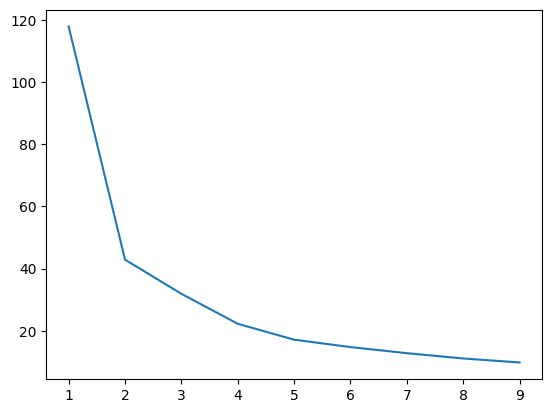

In [ ]:
plt.plot (range(1,10), wcss)

In [ ]:
kmeans = KMeans(n_clusters=2)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Items_clustering_for_fit)
y_predicted

In [ ]:
cluster_category_ACCESORIES['cluster_ACCESORIES'] = y_predicted
cluster_category_ACCESORIES['cluster_ACCESORIES'].value_counts()
#Items_clustering[['items', 'cluster']]

<ipython-input-268-7079aed141f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_ACCESORIES['cluster_ACCESORIES'] = y_predicted


0    523
1     42
Name: cluster_ACCESORIES, dtype: int64

In [ ]:
# revisar depenndiendo de las metricas de los grupos #MATI

In [ ]:
cluster_category_ACCESORIES[cluster_category_ACCESORIES['cluster_ACCESORIES']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
New York,42.0,1.359547,0.712293,0.035077,0.923315,1.288408,1.847558,3.082445
Boston,42.0,0.434158,0.319605,-0.044245,0.198013,0.366160,0.685956,1.265268
Philadelphia,42.0,0.743732,0.463977,-0.086959,0.454433,0.700525,1.113702,1.862071
weekend_seals_mean,42.0,0.853094,0.449388,0.295735,0.527364,0.740961,1.120966,2.186247
weekdays_seals_mean,42.0,0.986453,0.500307,0.263442,0.576080,0.886126,1.316436,2.333095
spring_month_mean,42.0,1.057747,0.557029,0.291296,0.662059,1.008529,1.414491,2.528635
summer_month_mean,42.0,0.868288,0.484383,0.204281,0.476018,0.739284,1.154956,2.203706
autumn_month_mean,42.0,0.802101,0.403643,0.209824,0.496208,0.751546,1.029227,1.954407
winter_month_mean,42.0,1.010740,0.490480,0.326767,0.638738,0.957700,1.388705,2.395313
sell_price,42.0,-0.883565,0.522701,-1.139641,-1.087556,-1.063096,-1.019381,1.718291


###

In [ ]:
cluster_category_ACCESORIES.groupby('cluster_ACCESORIES').mean().T #[Items_clustering['cluster']==0].describe().T

cluster_ACCESORIES,0,1
New York,-0.341273,1.359547
Boston,-0.261329,0.434158
Philadelphia,-0.350071,0.743732
weekend_seals_mean,-0.332552,0.853094
weekdays_seals_mean,-0.338925,0.986453
spring_month_mean,-0.349799,1.057747
summer_month_mean,-0.320859,0.868288
autumn_month_mean,-0.317150,0.802101
winter_month_mean,-0.339140,1.010740
sell_price,0.504491,-0.883565


###cluster_category_HOME_&_GARDEN	

In [ ]:
cluster_category_HOME_GARDEN = Items_clustering.groupby('category_HOME_&_GARDEN').get_group(1)

In [ ]:
Items_clustering_for_fit = cluster_category_HOME_GARDEN.drop('item', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Items_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Items_clustering_for_fit, i)

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Items_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

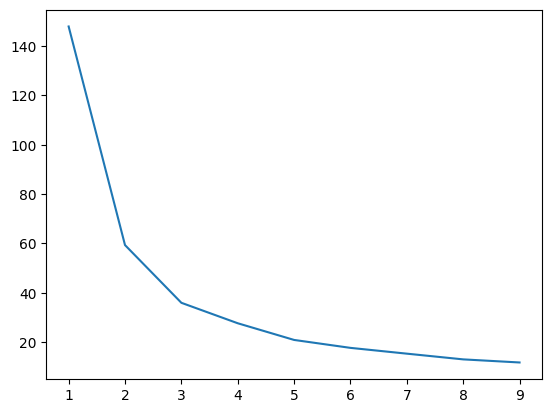

In [ ]:
plt.plot (range(1,10), wcss)

In [ ]:
kmeans = KMeans(n_clusters=2)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Items_clustering_for_fit)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'] = y_predicted
cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'].value_counts()
#Items_clustering[['items', 'cluster']]

<ipython-input-315-fcc4a271f761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'] = y_predicted


0    994
1     53
Name: cluster_HOME_GARDEN, dtype: int64

In [ ]:
# revisar depenndiendo de las metricas de los grupos #MATI

In [ ]:
cluster_category_HOME_GARDEN[cluster_category_HOME_GARDEN['cluster_HOME_GARDEN']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
New York,53.0,1.409823,0.732844,0.259495,0.790166,1.219678,1.951493,3.204583
Boston,53.0,1.433618,0.801150,0.107637,0.850553,1.231840,1.971221,3.452463
Philadelphia,53.0,1.397767,0.970318,-0.228850,0.655955,1.195516,2.155785,4.122887
weekend_seals_mean,53.0,1.509717,0.759747,0.594484,0.855174,1.222959,2.080374,3.318905
weekdays_seals_mean,53.0,1.504607,0.767429,0.647930,0.858976,1.174866,2.069105,3.428814
spring_month_mean,53.0,1.556794,0.841314,0.465228,0.859275,1.360518,2.087031,3.570701
summer_month_mean,53.0,1.429063,0.783531,0.178348,0.766515,1.182815,1.984520,3.558360
autumn_month_mean,53.0,1.492873,0.750940,0.456443,0.890439,1.280245,2.076016,3.379274
winter_month_mean,53.0,1.417591,0.683635,0.312885,0.866871,1.293581,1.930674,3.106646
sell_price,53.0,-0.591650,0.551447,-0.972448,-0.959858,-0.957923,-0.336766,1.514860


###cluster_category_SUPERMARKET

In [ ]:
cluster_category_SUPERMARKET = Items_clustering.groupby('category_SUPERMARKET').get_group(1)

In [ ]:
Items_clustering_for_fit = cluster_category_SUPERMARKET.drop('item', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Items_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Items_clustering_for_fit, i)

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Items_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

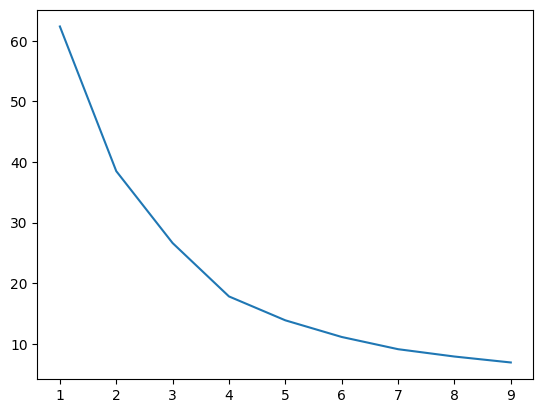

In [ ]:
plt.plot (range(1,10), wcss)

In [ ]:
kmeans = KMeans(n_clusters=2)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Items_clustering_for_fit)
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
cluster_category_SUPERMARKET['cluster_SUPERMARKET'] = y_predicted
cluster_category_SUPERMARKET['cluster_SUPERMARKET'].value_counts()
#Items_clustering[['items', 'cluster']]

<ipython-input-291-47a4d9db9e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_SUPERMARKET['cluster_SUPERMARKET'] = y_predicted


0    1370
1      67
Name: cluster_SUPERMARKET, dtype: int64

In [ ]:
# revisar depenndiendo de las metricas de los grupos #MATI

In [ ]:
cluster_category_SUPERMARKET[cluster_category_SUPERMARKET['cluster_SUPERMARKET']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
New York,67.0,4.436197,3.690074,1.030973,2.331306,3.503363,4.946974,25.448992
Boston,67.0,4.261713,4.437401,0.812225,2.039689,2.912781,4.119499,27.859342
Philadelphia,67.0,4.755286,3.256265,1.047845,3.091265,3.840895,5.515220,19.638686
weekend_seals_mean,67.0,4.711794,3.653486,2.019323,2.760755,3.610635,5.248636,23.087620
weekdays_seals_mean,67.0,4.768063,3.478149,2.349131,2.815192,3.710788,5.436948,21.653358
spring_month_mean,67.0,4.757333,3.334867,2.119377,2.855950,3.627279,5.535702,19.976957
summer_month_mean,67.0,4.791221,3.575428,1.912367,2.666727,3.517251,5.275448,20.643117
autumn_month_mean,67.0,4.529816,3.952510,1.733891,2.659186,3.236315,4.882455,27.378042
winter_month_mean,67.0,4.672155,3.602193,1.642325,2.864978,3.549729,4.743175,23.552073
sell_price,67.0,-0.825830,0.252729,-1.173877,-0.968964,-0.863664,-0.731117,0.089425


In [ ]:
cluster_category_SUPERMARKET['cluster_SUPERMARKET'].replace([0,1],['Supermarket_0','Supermarket_1'], inplace=True)
cluster_category_ACCESORIES['cluster_ACCESORIES'].replace([0,1],['Accesories_0','Accesories_1'], inplace=True)
cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'].replace([0,1],['Home_Garden_0','Home_Garden_1'], inplace=True)

g= pd.concat([ cluster_category_ACCESORIES['cluster_ACCESORIES'], cluster_category_HOME_GARDEN['cluster_HOME_GARDEN'], cluster_category_SUPERMARKET['cluster_SUPERMARKET']], axis=0)
g = pd.DataFrame(g)
g.rename(columns={0:'cluster'}, inplace=True)

<ipython-input-294-fc74f0b2781a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_SUPERMARKET['cluster_SUPERMARKET'].replace([0,1],['Supermarket_0','Supermarket_1'], inplace=True)
<ipython-input-294-fc74f0b2781a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_category_ACCESORIES['cluster_ACCESORIES'].replace([0,1],['Accesories_0','Accesories_1'], inplace=True)
<ipython-input-294-fc74f0b2781a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
r= Items_clustering_1[['item', 'category']]

In [ ]:
s = Items_clustering_1.select_dtypes(include=np.number).round()/10

In [ ]:
f = pd.concat([r,g,s], axis=1)

In [ ]:
f.to_csv('df_clusters_items_final.csv', index= False)
files.download('df_clusters_items_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f[f['cluster']=='House_Garden_0'].describe().T

,count,mean,std,min,25%,50%,75%,max
Greenwich_Village,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harlem,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tribeca,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brooklyn,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South_End,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roxbury,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Back_Bay,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Midtown_Village,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yorktown,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Queen_Village,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN




##Dataset tiendas

In [ ]:
def mean_ventas_porX_porY (X, Y): 
                             #cambie el .sum por .mean
  ventas_por_categoria_por_tienda = df_item_sales.groupby([X,Y])
  x=df_item_sales[X].unique()
  y=df_item_sales[Y].unique()
  cant_ventas_por_categoria_por_tienda=pd.DataFrame(x)
  
  for i in y:
    ventas_i=[]
    for j in x:

      ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
      ventas_i.append(ventas_j_i)

    cant_ventas_por_categoria_por_tienda[i]=ventas_i


  return cant_ventas_por_categoria_por_tienda

In [ ]:
Stores_clustering = mean_ventas_porX_porY('store','category')

<ipython-input-66-7ab9eb2a1d58>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-66-7ab9eb2a1d58>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()
<ipython-input-66-7ab9eb2a1d58>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ventas_j_i = ventas_por_categoria_por_tienda.get_group((j,i)).sum(axis=1).mean()


In [ ]:
Stores_clustering.rename(columns={'ACCESORIES':'ACCESORIES_mean', 'HOME_&_GARDEN':'HOME_&_GARDEN_mean', 'SUPERMARKET':'SUPERMARKET_mean'}, inplace=True)

In [ ]:
df_item_sales.groupby('store')['region'].unique() 

store
Back_Bay                   [Boston]
Brooklyn                 [New York]
Greenwich_Village        [New York]
Harlem                   [New York]
Midtown_Village      [Philadelphia]
Queen_Village        [Philadelphia]
Roxbury                    [Boston]
South_End                  [Boston]
Tribeca                  [New York]
Yorktown             [Philadelphia]
Name: region, dtype: object

In [ ]:
Stores_clustering.sort_values(by=0, inplace=True)
Stores_clustering['region']=df_item_sales.groupby('store')['region'].unique().tolist() 

In [ ]:
Stores_clustering.rename(columns={0:'tiendas'}, inplace=True)
Stores_clustering.set_index('tiendas', inplace=True)
Stores_clustering

,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,region
tiendas,,,,
Back_Bay,933.200000,1336.183381,2897.068894,[Boston]
Brooklyn,999.035398,687.484241,1962.021573,[New York]
Greenwich_Village,1551.642478,1376.036294,3744.487126,[New York]
Harlem,1128.854867,1497.051576,2421.892136,[New York]
Midtown_Village,1160.523894,1007.654250,2392.729297,[Philadelphia]
Queen_Village,825.961062,1175.199618,3292.052888,[Philadelphia]
Roxbury,1125.658407,1493.087870,3489.995825,[Boston]
South_End,759.440708,1325.691500,2629.233820,[Boston]
Tribeca,1700.791150,2589.725883,5230.194850,[New York]


In [ ]:
weekday_mean = calendar_total_ventas_por_dia_por_tienda.groupby('weekday').mean().sort_values('weekday_int').T
weekday_mean.drop('weekday_int', inplace=True)
weekday_mean.reset_index(inplace=True)
weekday_mean.sort_values(by=['index'], inplace=True)
weekday_mean.rename(columns={'index':'tiendas', 'Saturday':'Saturday_seals_mean', 'Sunday':'Sunday_seals_mean',
                             'Monday':'Monday_seals_mean', 'Tuesday':'Tuesday_seals_mean',
                             'Wednesday':'Wednesday_seals_mean', 'Thursday':'Thursday_seals_mean',
                             'Friday':'Friday_seals_mean'}, inplace=True)
weekday_mean

weekday,tiendas,Saturday_seals_mean,Sunday_seals_mean,Monday_seals_mean,Tuesday_seals_mean,Wednesday_seals_mean,Thursday_seals_mean,Friday_seals_mean
6,Back_Bay,3678.284672,3780.302920,3184.633700,2874.747253,2818.809524,2830.736264,3110.402930
3,Brooklyn,2395.810219,2460.916058,2176.714286,1999.073260,1940.783883,1947.967033,2092.725275
0,Greenwich_Village,5064.722628,5129.744526,3853.578755,3410.919414,3320.036630,3359.666667,4022.582418
1,Harlem,3981.040146,3808.335766,2620.098901,2449.021978,2445.769231,2507.120879,2985.996337
7,Midtown_Village,3642.175182,3137.113139,2308.813187,2244.626374,2310.318681,2331.842491,2861.311355
9,Queen_Village,4130.514599,3873.828467,3131.937729,2987.692308,2917.934066,2966.065934,3507.695971
5,Roxbury,4505.357664,4624.875912,3657.630037,3279.161172,3284.457875,3333.161172,3708.227106
4,South_End,3451.700730,3661.901460,2806.963370,2584.556777,2575.417582,2584.772894,2804.205128
2,Tribeca,6722.861314,7039.007299,5882.446886,5379.721612,5196.124542,5138.490842,5573.282051
8,Yorktown,3974.427007,3613.996350,3230.150183,3159.260073,3200.369963,3205.183150,3559.556777


In [ ]:
weekday_mean['weekend_seals_mean'] = pd.DataFrame((weekday_mean['Saturday_seals_mean'] + weekday_mean['Sunday_seals_mean'])/2)
weekday_mean['weekdays_seals_mean'] = pd.DataFrame((weekday_mean['Monday_seals_mean'] + weekday_mean['Tuesday_seals_mean'] 
                              + weekday_mean['Wednesday_seals_mean'] + weekday_mean['Thursday_seals_mean']
                              + weekday_mean['Friday_seals_mean'])/5)

weekday_seals_means = weekday_mean

weekday_seals_means.drop(['Saturday_seals_mean',
                          'Sunday_seals_mean',
                          'Monday_seals_mean',
                          'Tuesday_seals_mean',
                          'Wednesday_seals_mean',
                          'Thursday_seals_mean',
                          'Friday_seals_mean'],
                          axis=1,
                          inplace=True)

In [ ]:
Stores_clustering = Stores_clustering.merge(
                            weekday_seals_means,
                            how = "left",
                            on = "tiendas"
                            )
Stores_clustering

,tiendas,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,region,weekend_seals_mean,weekdays_seals_mean
0,Back_Bay,933.200000,1336.183381,2897.068894,[Boston],3729.293796,2963.865934
1,Brooklyn,999.035398,687.484241,1962.021573,[New York],2428.363139,2031.452747
2,Greenwich_Village,1551.642478,1376.036294,3744.487126,[New York],5097.233577,3593.356777
3,Harlem,1128.854867,1497.051576,2421.892136,[New York],3894.687956,2601.601465
4,Midtown_Village,1160.523894,1007.654250,2392.729297,[Philadelphia],3389.644161,2411.382418
5,Queen_Village,825.961062,1175.199618,3292.052888,[Philadelphia],4002.171533,3102.265201
6,Roxbury,1125.658407,1493.087870,3489.995825,[Boston],4565.116788,3452.527473
7,South_End,759.440708,1325.691500,2629.233820,[Boston],3556.801095,2671.183150
8,Tribeca,1700.791150,2589.725883,5230.194850,[New York],6880.934307,5434.013187
9,Yorktown,655.246018,1342.515759,3318.151705,[Philadelphia],3794.211679,3270.904029


In [ ]:
calendar_tot_ventas_p_d_p_tienda = df_calendar.set_index('d')
for i in stores:

  time_serie = calendario_de_ventas_por_atributo(df_item_sales, 'store', i)
  tsv = time_serie.drop('weekday_int', axis=1) #para que el sum no sume el numenro del dia de la semana.
  resultado = tsv.sum(axis=1)

  calendar_tot_ventas_p_d_p_tienda[i] = resultado




<ipython-input-75-04b2d763a41a>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-75-04b2d763a41a>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-75-04b2d763a41a>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultado = tsv.sum(axis=1)
<ipython-input-75-04b2d763a41a>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future versio

In [ ]:
calendar_tot_ventas_p_d_p_tienda

,date,weekday,weekday_int,event,Greenwich_Village,Harlem,Tribeca,Brooklyn,South_End,Roxbury,Back_Bay,Midtown_Village,Yorktown,Queen_Village
d,,,,,,,,,,,,,,
d_1,2011-01-29,Saturday,1,NaN,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
d_2,2011-01-30,Sunday,2,NaN,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
d_3,2011-01-31,Monday,3,NaN,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
d_4,2011-02-01,Tuesday,4,NaN,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
d_5,2011-02-02,Wednesday,5,NaN,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,2016-04-20,Wednesday,5,NaN,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159
d_1910,2016-04-21,Thursday,6,NaN,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226
d_1911,2016-04-22,Friday,7,NaN,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828


In [ ]:
calendar_tot_ventas_p_d_p_tienda['date'] = pd.to_datetime(calendar_tot_ventas_p_d_p_tienda['date'])
ca = calendar_tot_ventas_p_d_p_tienda.set_index("date").resample("M").mean()
gca = ca.groupby(ca.index.month)
gca.mean() #hago el promedio de de las ventas de cada mes por tienda. es el promedio del promedio, 
           #primero promedio las ventas de cada mes de los 6 años y despues promendio cada mes por su cuenta, enero, febrero...

,weekday_int,Greenwich_Village,Harlem,Tribeca,Brooklyn,South_End,Roxbury,Back_Bay,Midtown_Village,Yorktown,Queen_Village
date,,,,,,,,,,,
1,3.698925,3861.426523,2920.446237,5492.544803,2057.252688,2720.505376,3571.487455,2998.589606,2739.039427,3332.985663,3468.978495
2,4.000000,3899.609401,2916.622947,5708.640599,2093.118227,2908.068760,3814.094417,3187.631773,2772.300493,3678.225164,3645.490353
3,3.983871,3939.887097,2980.510753,5767.661290,2135.333333,2915.198925,3768.801075,3171.532258,2747.080645,3404.720430,3509.112903
4,3.986111,4092.126389,3026.184722,5814.472222,2182.151389,2987.854167,3756.865278,3194.104167,2735.022222,3418.398611,3363.281944
5,4.038710,3954.935484,2683.122581,5606.083871,2083.058065,2883.038710,3641.425806,3055.748387,2513.470968,2958.425806,3124.541935
6,3.960000,4168.380000,3000.773333,6112.080000,2179.853333,3042.853333,3929.986667,3280.520000,2667.760000,3333.466667,3285.740000
7,4.025806,4181.103226,3079.077419,6123.496774,2164.354839,3005.793548,3923.187097,3284.232258,2645.980645,3381.806452,3333.387097
8,4.000000,4290.903226,3161.309677,6313.083871,2193.470968,3106.038710,4000.096774,3418.296774,2612.606452,3523.825806,3327.012903
9,3.980000,4137.173333,3146.633333,6221.353333,2251.380000,3009.473333,3884.926667,3300.386667,2570.600000,3573.593333,3383.740000


In [ ]:
month_mean_p_store = gca.mean()
month_mean_p_store.drop('weekday_int', axis=1, inplace=True)
month_mean_p_store = month_mean_p_store.T
month_mean_p_store.reset_index(inplace=True)
month_mean_p_store.sort_values('index', inplace=True)
month_mean_p_store.rename(columns={'index':'tiendas', 1:'jen_mean', 2:'feb_mean', 3:'march_mean', 4:'apr_mean', 5:'may_mean', 6:'jun_mean',
                                   7:'jul_mean', 8:'agu_mean', 9:'sep_mean', 10:'oct_mean', 11:'nov_man', 12:'dic_mean'}, inplace=True)

month_mean_p_store

date,tiendas,jen_mean,feb_mean,march_mean,apr_mean,may_mean,jun_mean,jul_mean,agu_mean,sep_mean,oct_mean,nov_man,dic_mean
6,Back_Bay,2998.589606,3187.631773,3171.532258,3194.104167,3055.748387,3280.520000,3284.232258,3418.296774,3300.386667,3245.793548,3054.586667,2994.432258
3,Brooklyn,2057.252688,2093.118227,2135.333333,2182.151389,2083.058065,2179.853333,2164.354839,2193.470968,2251.380000,2230.122581,2088.540000,2025.232258
0,Greenwich_Village,3861.426523,3899.609401,3939.887097,4092.126389,3954.935484,4168.380000,4181.103226,4290.903226,4137.173333,4057.270968,3886.900000,3853.329032
1,Harlem,2920.446237,2916.622947,2980.510753,3026.184722,2683.122581,3000.773333,3079.077419,3161.309677,3146.633333,3051.187097,2860.673333,2887.316129
7,Midtown_Village,2739.039427,2772.300493,2747.080645,2735.022222,2513.470968,2667.760000,2645.980645,2612.606452,2570.600000,2567.967742,2775.533333,2867.554839
9,Queen_Village,3468.978495,3645.490353,3509.112903,3363.281944,3124.541935,3285.740000,3333.387097,3327.012903,3383.740000,3357.877419,3303.113333,3250.477419
5,Roxbury,3571.487455,3814.094417,3768.801075,3756.865278,3641.425806,3929.986667,3923.187097,4000.096774,3884.926667,3793.109677,3582.140000,3590.445161
4,South_End,2720.505376,2908.068760,2915.198925,2987.854167,2883.038710,3042.853333,3005.793548,3106.038710,3009.473333,2893.309677,2779.486667,2798.387097
2,Tribeca,5492.544803,5708.640599,5767.661290,5814.472222,5606.083871,6112.080000,6123.496774,6313.083871,6221.353333,5980.000000,5577.806667,5349.741935
8,Yorktown,3332.985663,3678.225164,3404.720430,3418.398611,2958.425806,3333.466667,3381.806452,3523.825806,3573.593333,3536.838710,3382.046667,3363.548387


In [ ]:
month_mean_p_store['spring_month_mean'] = pd.DataFrame((month_mean_p_store['march_mean'] + 
                                                       month_mean_p_store['apr_mean'] + 
                                                       month_mean_p_store['may_mean'])/3)
month_mean_p_store['summer_month_mean'] = pd.DataFrame((month_mean_p_store['jun_mean'] + 
                                                       month_mean_p_store['jul_mean'] + 
                                                       month_mean_p_store['agu_mean'])/3)
month_mean_p_store['autumn_month_mean'] = pd.DataFrame((month_mean_p_store['sep_mean'] + 
                                                       month_mean_p_store['oct_mean'] +
                                                       month_mean_p_store['nov_man'])/3)
month_mean_p_store['winter_month_mean'] = pd.DataFrame((month_mean_p_store['dic_mean'] + 
                                                       month_mean_p_store['jen_mean'] + 
                                                       month_mean_p_store['feb_mean'])/3)                                                                                                                                                                     
                                          

month_mean_p_store = month_mean_p_store

month_mean_p_store.drop([ 'jen_mean',
                          'feb_mean',
                          'march_mean',
                          'apr_mean',
                          'may_mean',
                          'jun_mean',
                          'jul_mean',
                          'agu_mean',
                          'sep_mean',
                          'oct_mean',
                          'nov_man',
                          'dic_mean'],
                          axis=1,
                          inplace=True)

#Agrupo los meses por estaciones del año

In [ ]:
Stores_clustering = Stores_clustering.merge(
                            month_mean_p_store,
                            how = "left",
                            on = "tiendas"
                            )
Stores_clustering

,tiendas,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,region,weekend_seals_mean,weekdays_seals_mean,spring_month_mean,summer_month_mean,autumn_month_mean,winter_month_mean
0,Back_Bay,933.200000,1336.183381,2897.068894,[Boston],3729.293796,2963.865934,3140.461604,3327.683011,3200.255627,3060.217879
1,Brooklyn,999.035398,687.484241,1962.021573,[New York],2428.363139,2031.452747,2133.514262,2179.226380,2190.014194,2058.534391
2,Greenwich_Village,1551.642478,1376.036294,3744.487126,[New York],5097.233577,3593.356777,3995.649657,4213.462151,4027.114767,3871.454985
3,Harlem,1128.854867,1497.051576,2421.892136,[New York],3894.687956,2601.601465,2896.606019,3080.386810,3019.497921,2908.128438
4,Midtown_Village,1160.523894,1007.654250,2392.729297,[Philadelphia],3389.644161,2411.382418,2665.191278,2642.115699,2638.033692,2792.964919
5,Queen_Village,825.961062,1175.199618,3292.052888,[Philadelphia],4002.171533,3102.265201,3332.312261,3315.380000,3348.243584,3454.982089
6,Roxbury,1125.658407,1493.087870,3489.995825,[Boston],4565.116788,3452.527473,3722.364053,3951.090179,3753.392115,3658.675678
7,South_End,759.440708,1325.691500,2629.233820,[Boston],3556.801095,2671.183150,2928.697267,3051.561864,2894.089892,2808.987078
8,Tribeca,1700.791150,2589.725883,5230.194850,[New York],6880.934307,5434.013187,5729.405795,6182.886882,5926.386667,5516.975779
9,Yorktown,655.246018,1342.515759,3318.151705,[Philadelphia],3794.211679,3270.904029,3260.514949,3413.032975,3497.492903,3458.253071


In [ ]:
Stores_clustering.T # este seria un posible dataset para poder estandarizar y correr el modelo de clustering
                    #las variables en el son por cada tienda: 
                    #promedio de ventas por cartegoria, region, promendio de ventas por dia de la semana y promendio de ventas por mes del año.

,0,1,2,3,4,5,6,7,8,9
tiendas,Back_Bay,Brooklyn,Greenwich_Village,Harlem,Midtown_Village,Queen_Village,Roxbury,South_End,Tribeca,Yorktown
ACCESORIES_mean,933.2,999.035398,1551.642478,1128.854867,1160.523894,825.961062,1125.658407,759.440708,1700.79115,655.246018
HOME_&_GARDEN_mean,1336.183381,687.484241,1376.036294,1497.051576,1007.65425,1175.199618,1493.08787,1325.6915,2589.725883,1342.515759
SUPERMARKET_mean,2897.068894,1962.021573,3744.487126,2421.892136,2392.729297,3292.052888,3489.995825,2629.23382,5230.19485,3318.151705
region,[Boston],[New York],[New York],[New York],[Philadelphia],[Philadelphia],[Boston],[Boston],[New York],[Philadelphia]
weekend_seals_mean,3729.293796,2428.363139,5097.233577,3894.687956,3389.644161,4002.171533,4565.116788,3556.801095,6880.934307,3794.211679
weekdays_seals_mean,2963.865934,2031.452747,3593.356777,2601.601465,2411.382418,3102.265201,3452.527473,2671.18315,5434.013187,3270.904029
spring_month_mean,3140.461604,2133.514262,3995.649657,2896.606019,2665.191278,3332.312261,3722.364053,2928.697267,5729.405795,3260.514949
summer_month_mean,3327.683011,2179.22638,4213.462151,3080.38681,2642.115699,3315.38,3951.090179,3051.561864,6182.886882,3413.032975
autumn_month_mean,3200.255627,2190.014194,4027.114767,3019.497921,2638.033692,3348.243584,3753.392115,2894.089892,5926.386667,3497.492903


In [ ]:
Stores_clustering_1 = Stores_clustering.copy()

In [ ]:
Stores_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tiendas              10 non-null     object 
 1   ACCESORIES_mean      10 non-null     float64
 2   HOME_&_GARDEN_mean   10 non-null     float64
 3   SUPERMARKET_mean     10 non-null     float64
 4   region               10 non-null     object 
 5   weekend_seals_mean   10 non-null     float64
 6   weekdays_seals_mean  10 non-null     float64
 7   spring_month_mean    10 non-null     float64
 8   summer_month_mean    10 non-null     float64
 9   autumn_month_mean    10 non-null     float64
 10  winter_month_mean    10 non-null     float64
dtypes: float64(9), object(2)
memory usage: 1.2+ KB


In [ ]:
#Items_clustering.select_dtypes(include=np.number)
scaler = StandardScaler().fit_transform(Stores_clustering.select_dtypes(include=np.number)) 

Stores_clustering_S = pd.DataFrame(
    data = scaler, 
    index = Stores_clustering.select_dtypes(include=np.number).index,
    columns = Stores_clustering.select_dtypes(include=np.number).columns
)

In [ ]:
Stores_clustering = pd.concat([Stores_clustering[['tiendas', 'region']], Stores_clustering_S], axis = 1)

In [ ]:
Stores_clustering['region'] = Stores_clustering['region'].astype('str')

In [ ]:
dummy_dataset = pd.get_dummies(Stores_clustering['region'], prefix = 'region')

In [ ]:
dummy_dataset

,region_['Boston'],region_['New York'],region_['Philadelphia']
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1
6,1,0,0
7,1,0,0
8,0,1,0
9,0,0,1


In [ ]:
# one hot encoder, no me anda no se por que

_dummy_dataset = pd.get_dummies(Stores_clustering['region'], prefix = 'region')
Stores_clustering = pd.concat([Stores_clustering, _dummy_dataset], axis = 1)
Stores_clustering.drop('region', axis = 1 , inplace = True)

#una vez echo el ohe ya se puede aplicar el clustering... en estos dias lo hago

In [ ]:
Stores_clustering.T

,0,1,2,3,4,5,6,7,8,9
tiendas,Back_Bay,Brooklyn,Greenwich_Village,Harlem,Midtown_Village,Queen_Village,Roxbury,South_End,Tribeca,Yorktown
ACCESORIES_mean,-0.478316,-0.269544,1.482834,0.142128,0.242554,-0.818382,0.131991,-1.029326,1.955801,-1.359739
HOME_&_GARDEN_mean,-0.100956,-1.497936,-0.015132,0.245475,-0.808447,-0.447636,0.23694,-0.12355,2.59856,-0.087319
SUPERMARKET_mean,-0.274439,-1.340492,0.691707,-0.816191,-0.84944,0.175884,0.40156,-0.5798,2.385571,0.20564
weekend_seals_mean,-0.357442,-1.506881,0.851202,-0.211308,-0.65754,-0.116341,0.38105,-0.509848,2.427192,-0.300084
weekdays_seals_mean,-0.21331,-1.263491,0.495688,-0.62133,-0.835574,-0.05743,0.337071,-0.54296,2.568827,0.132508
spring_month_mean,-0.258932,-1.345263,0.663676,-0.522012,-0.77167,-0.051956,0.368846,-0.487391,2.534115,-0.129414
summer_month_mean,-0.199902,-1.303647,0.651393,-0.43757,-0.858779,-0.211726,0.399235,-0.465273,2.544145,-0.117875
autumn_month_mean,-0.257386,-1.300825,0.596646,-0.444083,-0.838083,-0.104534,0.313928,-0.573612,2.558331,0.049619
winter_month_mean,-0.341845,-1.488217,0.586571,-0.515903,-0.647702,0.109941,0.343057,-0.629365,2.46978,0.113684


##Modelo tiendas

In [ ]:
Stores_clustering_for_fit = Stores_clustering.drop('tiendas', axis=1)

In [ ]:
def minmaxTransformacion(df, columna):
    scaler=MinMaxScaler()
    df[columna]=scaler.fit_transform(df[columna].values.reshape(-1,1))
    return scaler

In [ ]:
lista = Stores_clustering_for_fit.columns.tolist()
for i in lista:
   minmaxTransformacion(Stores_clustering_for_fit, i)

In [ ]:
Stores_clustering_for_fit

,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,weekend_seals_mean,weekdays_seals_mean,spring_month_mean,summer_month_mean,autumn_month_mean,winter_month_mean,region_['Boston'],region_['New York'],region_['Philadelphia']
0,0.265846,0.341018,0.286107,0.292175,0.274033,0.280027,0.286852,0.270380,0.289634,1.0,0.0,0.0
1,0.328814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,0.857348,0.361969,0.545401,0.599400,0.459038,0.517851,0.508094,0.491680,0.524202,0.0,1.0,0.0
3,0.452978,0.425586,0.140712,0.329321,0.167565,0.212212,0.225084,0.222002,0.245658,0.0,1.0,0.0
4,0.483267,0.168312,0.131789,0.215893,0.111660,0.147857,0.115617,0.119908,0.212359,0.0,0.0,1.0
5,0.163279,0.256390,0.406965,0.353461,0.314708,0.333380,0.283779,0.309988,0.403779,0.0,0.0,1.0
6,0.449921,0.423502,0.467532,0.479892,0.417649,0.441851,0.442561,0.418421,0.462677,1.0,0.0,0.0
7,0.099656,0.335503,0.204154,0.253435,0.188014,0.221137,0.217884,0.188438,0.216992,1.0,0.0,0.0
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0
9,0.000000,0.344347,0.414950,0.306755,0.364270,0.313413,0.308170,0.349933,0.404725,0.0,0.0,1.0


In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Stores_clustering_for_fit)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

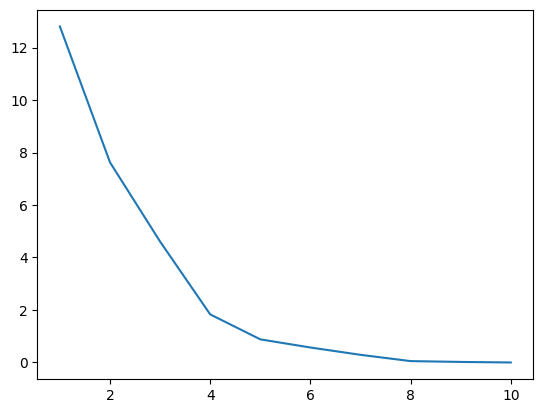

In [ ]:
plt.plot (range(1,11), wcss)

In [ ]:
kmeans = KMeans(n_clusters=3)#, random_state=0, n_init="auto").fit(Stores_clustering_for_fit)

In [ ]:
y_predicted = kmeans.fit_predict(Stores_clustering_for_fit)
y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 2, 0, 1, 1, 1, 1, 2, 1], dtype=int32)

In [ ]:
Stores_clustering_1['cluster'] = y_predicted
Stores_clustering_1[['tiendas', 'cluster']]

,tiendas,cluster
0,Back_Bay,1
1,Brooklyn,0
2,Greenwich_Village,2
3,Harlem,0
4,Midtown_Village,1
5,Queen_Village,1
6,Roxbury,1
7,South_End,1
8,Tribeca,2
9,Yorktown,1


In [ ]:
Stores_clustering_1.groupby('cluster').mean().T

cluster,0,1,2
ACCESORIES_mean,1063.945133,910.005015,1626.216814
HOME_&_GARDEN_mean,1092.267908,1280.055396,1982.881089
SUPERMARKET_mean,2191.956855,3003.205405,4487.340988
weekend_seals_mean,3161.525547,3839.539842,5989.083942
weekdays_seals_mean,2316.527106,2978.688034,4513.684982
spring_month_mean,2515.060140,3174.923569,4862.527726
summer_month_mean,2629.806595,3283.477288,5198.174516
autumn_month_mean,2604.756057,3221.917969,4976.750717
winter_month_mean,2483.331414,3205.680119,4694.215382


In [ ]:
t = Stores_clustering_1[['region']].replace(['[Boston]'], ['Boston'], inplace=True)
Stores_clustering_1['region'].replace(['[New York]'], ['New York'], inplace=True)
Stores_clustering_1['region'].replace(['[Philadelphia]'], ['Philadelphia'], inplace=True)
t

<ipython-input-121-9bd8d0435dbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t = Stores_clustering_1[['region']].replace(['[Boston]'], ['Boston'], inplace=True)


In [ ]:
t

In [ ]:
s = Stores_clustering_1.select_dtypes(include=np.number).round()/10 #esto lo hago porque sino el Power BI no me lee bien los valores (por el divisor decimal), 
                                                                    #lo quise arreglar pero al final esta fue la unica opcion que me quedo

In [ ]:
r = pd.DataFrame(Stores_clustering_1[['tiendas', 'region']])

In [ ]:
f= pd.concat([r,s], axis=1)

In [ ]:
f.at[5, 'cluster']=0

In [ ]:
f

,tiendas,region,ACCESORIES_mean,HOME_&_GARDEN_mean,SUPERMARKET_mean,weekend_seals_mean,weekdays_seals_mean,spring_month_mean,summer_month_mean,autumn_month_mean,winter_month_mean,cluster
0,Back_Bay,[Boston],93.3,133.6,289.7,372.9,296.4,314.0,332.8,320.0,306.0,0.1
1,Brooklyn,[New York],99.9,68.7,196.2,242.8,203.1,213.4,217.9,219.0,205.9,0.0
2,Greenwich_Village,[New York],155.2,137.6,374.4,509.7,359.3,399.6,421.3,402.7,387.1,0.2
3,Harlem,[New York],112.9,149.7,242.2,389.5,260.2,289.7,308.0,301.9,290.8,0.0
4,Midtown_Village,[Philadelphia],116.1,100.8,239.3,339.0,241.1,266.5,264.2,263.8,279.3,0.1
5,Queen_Village,[Philadelphia],82.6,117.5,329.2,400.2,310.2,333.2,331.5,334.8,345.5,0.0
6,Roxbury,[Boston],112.6,149.3,349.0,456.5,345.3,372.2,395.1,375.3,365.9,0.1
7,South_End,[Boston],75.9,132.6,262.9,355.7,267.1,292.9,305.2,289.4,280.9,0.1
8,Tribeca,[New York],170.1,259.0,523.0,688.1,543.4,572.9,618.3,592.6,551.7,0.2
9,Yorktown,[Philadelphia],65.5,134.3,331.8,379.4,327.1,326.1,341.3,349.7,345.8,0.1


In [ ]:
f.to_csv('Stores_clustering.csv', index= False)
files.download('Stores_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Forecasting

##1

In [ ]:
df_item_sales_1 = df_item_sales.copy()

In [ ]:
df_item_sales_1.set_index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], inplace=True)

In [ ]:
date_strings = []
for i in df_item_sales_1.columns:
  date_strings.append(i)


In [ ]:
# Create a list of all date strings
date_strings 

# Extract the day number from each date string and create a new list of day numbers
day_numbers = [int(date_string.split('_')[1]) for date_string in date_strings]

# Create a Pandas datetime index using the day numbers
date_index = pd.date_range(start='2011-01-29', periods=len(day_numbers), freq='D')

# Assign the new datetime index to your DataFrame
df_item_sales_1.columns = date_index



In [ ]:
df_item_sales_1.reset_index(inplace=True)

In [ ]:
df_item_sales_1

,id,item,category,department,store,store_code,region,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,...,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
melt = df_item_sales_1.iloc[: , 7:]
melt

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
dfa = pd.melt(df_item_sales_1, id_vars = ['store', 'id', 'item'], value_vars = melt, var_name="day", value_name="value")

In [ ]:
dfa

,store,id,item,day,value
0,Greenwich_Village,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,2011-01-29,0
1,Greenwich_Village,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,2011-01-29,0
2,Greenwich_Village,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,2011-01-29,0
3,Greenwich_Village,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,2011-01-29,0
4,Greenwich_Village,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,2011-01-29,0
...,...,...,...,...,...
58327365,Queen_Village,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,2016-04-24,1
58327366,Queen_Village,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,2016-04-24,0
58327367,Queen_Village,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,2016-04-24,0
58327368,Queen_Village,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,2016-04-24,3


In [ ]:
dfa.rename(columns= {'day' : 'date', 'value': 'monthly_sales'}, inplace= True)

In [ ]:
df_a = dfa.set_index('date').groupby(['store', 'id']).resample('M').sum().reset_index()

In [ ]:
df_a

,store,id,date,monthly_sales
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0
...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89


In [ ]:
#df_0['day'].min()

10+12+12+12+12+4 = 64

In [ ]:
#df_0['day'].max()

In [ ]:
size = df_a.groupby("id").size()
size

id
ACCESORIES_1_001_BOS_1     64
ACCESORIES_1_001_BOS_2     64
ACCESORIES_1_001_BOS_3     64
ACCESORIES_1_001_NYC_1     64
ACCESORIES_1_001_NYC_2     64
                           ..
SUPERMARKET_3_827_NYC_3    64
SUPERMARKET_3_827_NYC_4    64
SUPERMARKET_3_827_PHI_1    64
SUPERMARKET_3_827_PHI_2    64
SUPERMARKET_3_827_PHI_3    64
Length: 30490, dtype: int64

In [ ]:
df_item_sales_1

,id,item,category,department,store,store_code,region,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,...,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
df_item_sales_m = df_item_sales_1[['id','item','department','category',	'store',	'store_code',	'region']]
df_item_sales_m

,id,item,department,category,store,store_code,region
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES_1,ACCESORIES,Greenwich_Village,NYC_1,New York
...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET_3,SUPERMARKET,Queen_Village,PHI_3,Philadelphia


In [ ]:
df_a

,store,id,date,monthly_sales
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0
...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89


In [ ]:
semi_final_df = pd.merge(left= df_a, right=df_item_sales_m, how='left', on= ['id', 'store'] )

In [ ]:
#semi_final_df.rename(columns= {'day' : 'date', 'value': 'monthly_sales'}, inplace= True)

In [ ]:
semi_final_df

,store,id,date,monthly_sales,item,department,category,store_code,region
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia


##Intento merge semi_final_df item_sale_price

In [ ]:
df_item_price_1 = df_item_price.copy()

In [ ]:
df_item_price_1


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


In [ ]:
df_item_price_1['sell_price'].isna().sum()

0

In [ ]:
df_item_price_1['yearweek'].isna().sum()

243920

In [ ]:
df_item_price_1.dropna(inplace=True)

In [ ]:
df_item_price_1['yearweek'] = df_item_price_1['yearweek'].astype(str)

In [ ]:
df_item_price_1['year'] = [x.split('.')[0] for x in df_item_price_1['yearweek']]

In [ ]:
df_item_price_1

,item,category,store_code,yearweek,sell_price,year
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414,201328
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414,201329
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858,201330
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858,201331
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858,201332
...,...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201613.0,1.2000,201613
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201614.0,1.2000,201614
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201615.0,1.2000,201615
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201616.0,1.2000,201616


In [ ]:
del(df_item_price_1['yearweek'])

In [ ]:
df_item_price_1['year'].value_counts(dropna=False)

201608    30490
201617    30490
201615    30490
201614    30490
201613    30490
          ...  
201109    13033
201108    12799
201107    12519
201106    11975
201105    10932
Name: year, Length: 279, dtype: int64

In [ ]:
df_item_price_1['year'].isna().sum()

0

In [ ]:
df_item_price_1['year']

0          201328
1          201329
2          201330
3          201331
4          201332
            ...  
6965693    201613
6965694    201614
6965695    201615
6965696    201616
6965697    201617
Name: year, Length: 6721786, dtype: object

In [ ]:
#df_item_price_1['year'] = df_item_price_1['year'].apply(lambda x: 'NaN' if x == 'nan' else x)

In [ ]:
df_item_price_1['year'].unique()

array(['201328', '201329', '201330', '201331', '201332', '201333',
       '201334', '201335', '201336', '201337', '201338', '201339',
       '201340', '201341', '201342', '201343', '201344', '201345',
       '201346', '201347', '201348', '201349', '201350', '201351',
       '201352', '201400', '201401', '201402', '201403', '201404',
       '201405', '201406', '201407', '201408', '201409', '201410',
       '201411', '201412', '201413', '201414', '201415', '201416',
       '201417', '201418', '201419', '201420', '201421', '201422',
       '201423', '201424', '201425', '201426', '201427', '201428',
       '201429', '201430', '201431', '201432', '201433', '201434',
       '201435', '201436', '201437', '201438', '201439', '201440',
       '201441', '201442', '201443', '201444', '201445', '201446',
       '201447', '201448', '201449', '201450', '201451', '201452',
       '201500', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '2015

In [ ]:
df_item_price_1['year'].value_counts()

201608    30490
201617    30490
201615    30490
201614    30490
201613    30490
          ...  
201109    13033
201108    12799
201107    12519
201106    11975
201105    10932
Name: year, Length: 279, dtype: int64

In [ ]:
def transform_date(date_str):
    date_obj = datetime.strptime(date_str + '1', '%Y%W%w')
    output_str = date_obj.strftime('%Y-%m-%d')
    return output_str

In [ ]:
df_item_price_1['date'] = df_item_price_1['year'].apply(transform_date)

In [ ]:
df_item_price_1['date'] = pd.to_datetime(df_item_price_1['date'])

In [ ]:
df_item_price_1

,item,category,store_code,sell_price,year,date
0,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414,201328,2013-07-15
1,ACCESORIES_1_001,ACCESORIES,NYC_1,12.7414,201329,2013-07-22
2,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,201330,2013-07-29
3,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,201331,2013-08-05
4,ACCESORIES_1_001,ACCESORIES,NYC_1,10.9858,201332,2013-08-12
...,...,...,...,...,...,...
6965693,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201613,2016-03-28
6965694,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201614,2016-04-04
6965695,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201615,2016-04-11
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,1.2000,201616,2016-04-18


In [ ]:
df_item_price_m = df_item_price_1.set_index('date').groupby('item').resample('M')['sell_price'].mean().to_frame()
df_item_price_m  #sum? o mean?

sell_price
item              date                  
ACCESORIES_1_001  2013-07-31   12.014333
                  2013-08-31   11.257120
                  2013-09-30   11.081560
                  2013-10-31   11.081560
                  2013-11-30   11.057620
...                                  ...
SUPERMARKET_3_827 2015-12-31    1.200000
                  2016-01-31    1.200000
                  2016-02-29    1.188000
                  2016-03-31    1.200000
                  2016-04-30    1.200000

[160427 rows x 1 columns]

In [ ]:
final_df = pd.merge(semi_final_df,df_item_price_m, how = 'left', on = ['item', 'date'] )

In [ ]:
#final_df.fillna(0, inplace =True)

In [ ]:
final_df

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN
...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200


In [ ]:
#final_df['Revenue'] = final_df['monthly_sales']*final_df['sell_price']


In [ ]:
#final_df['Revenue'].sum()

In [ ]:
df_calendar

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN


In [ ]:
df_calendar_1 = df_calendar[['date','weekday', 'event']]

In [ ]:
df_calendar_1['date']  = pd.to_datetime(df_calendar_1['date'])

<ipython-input-52-adeda240ff82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_1['date']  = pd.to_datetime(df_calendar_1['date'])


In [ ]:
df_final_analysis = pd.merge(final_df,df_calendar_1, how = 'left', on= 'date' )

In [ ]:
df_final_analysis['weekday'].unique()

array(['Monday', 'Thursday', 'Saturday', 'Tuesday', 'Sunday', 'Wednesday',
       'Friday', nan], dtype=object)

In [ ]:
df_final_analysis

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Monday,NaN
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Monday,NaN
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Thursday,NaN
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Saturday,NaN
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,NaN,Tuesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,NaN
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Sunday,NaN
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188,Monday,NaN
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,NaN


In [ ]:
df_final_analysis.fillna(0, inplace=True)

In [ ]:
final_df['sell_price'].max()

40.2381525

In [ ]:
df_item_price['sell_price'].max()

134.14999999999998

##EDA

In [ ]:
df_final_analysis['monthly_sales'].describe()

count    1.951360e+06
mean     3.366647e+01
std      9.747178e+01
min      0.000000e+00
25%      0.000000e+00
50%      9.000000e+00
75%      3.100000e+01
max      1.082100e+04
Name: monthly_sales, dtype: float64

<Axes: xlabel='monthly_sales', ylabel='Density'>

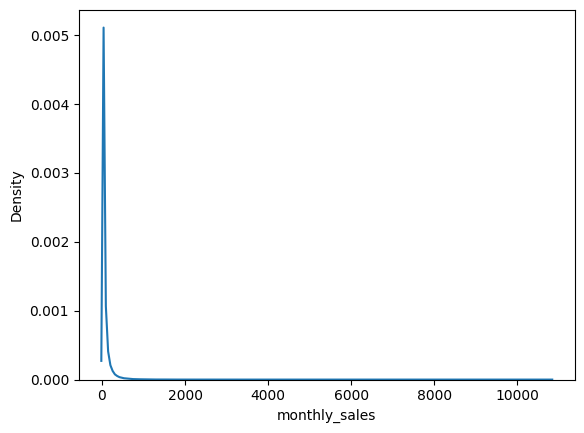

In [ ]:
sns.kdeplot(df_final_analysis['monthly_sales'])

In [ ]:
#df_final_analysis = df_final_analysis[df_final_analysis['monthly_sales'] <= 15]

In [ ]:
df_final_analysis[df_final_analysis['monthly_sales'] > 150]

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
453,Back_Bay,ACCESORIES_1_008_BOS_3,2011-06-30,194,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.66500,Thursday,0
454,Back_Bay,ACCESORIES_1_008_BOS_3,2011-07-31,220,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.66500,Sunday,0
455,Back_Bay,ACCESORIES_1_008_BOS_3,2011-08-31,182,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.66500,Wednesday,0
478,Back_Bay,ACCESORIES_1_008_BOS_3,2013-07-31,169,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.61180,Wednesday,0
481,Back_Bay,ACCESORIES_1_008_BOS_3,2013-10-31,170,ACCESORIES_1_008,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.61180,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951013,Yorktown,SUPERMARKET_3_822_PHI_2,2014-02-28,273,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,3.87600,Friday,0
1951015,Yorktown,SUPERMARKET_3_822_PHI_2,2014-04-30,355,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,3.65880,Wednesday,0
1951016,Yorktown,SUPERMARKET_3_822_PHI_2,2014-05-31,198,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,4.18800,Saturday,0
1951037,Yorktown,SUPERMARKET_3_822_PHI_2,2016-02-29,175,SUPERMARKET_3_822,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,4.82472,Monday,0


In [ ]:

df_final_analysis = df_final_analysis[df_final_analysis['monthly_sales'] <= 150]


In [ ]:
#df_final_analysis = df_final_analysis.drop(df_final_analysis[df_final_analysis['monthly_sales'] > 10].index)


In [ ]:
df_final_analysis[df_final_analysis['monthly_sales']>10].describe()

,monthly_sales,sell_price
count,843461.000000,843461.000000
mean,40.812848,4.996236
std,30.888388,3.915074
min,11.000000,0.215667
25%,18.000000,2.462500
50%,30.000000,3.712500
75%,53.000000,6.187500
max,150.000000,40.238152


<Axes: xlabel='monthly_sales', ylabel='Density'>

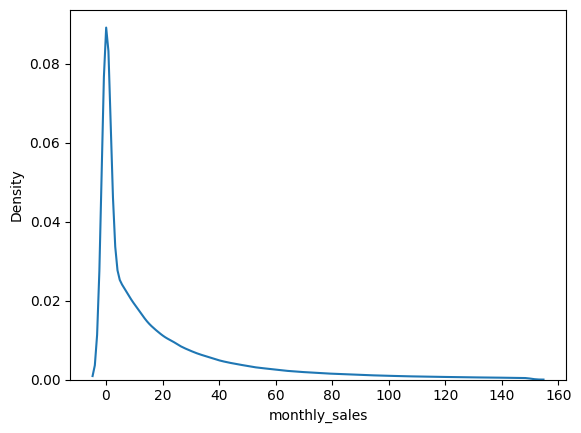

In [ ]:
sns.kdeplot(df_final_analysis['monthly_sales'])

###total sales/day

In [ ]:
dfa

,store,id,item,date,monthly_sales
0,Greenwich_Village,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,2011-01-29,0
1,Greenwich_Village,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,2011-01-29,0
2,Greenwich_Village,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,2011-01-29,0
3,Greenwich_Village,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,2011-01-29,0
4,Greenwich_Village,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,2011-01-29,0
...,...,...,...,...,...
58327365,Queen_Village,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,2016-04-24,1
58327366,Queen_Village,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,2016-04-24,0
58327367,Queen_Village,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,2016-04-24,0
58327368,Queen_Village,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,2016-04-24,3


In [ ]:
semi_final_df

,store,id,date,monthly_sales,item,department,category,store_code,region
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston
...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia


###total sales/week

In [ ]:
df_final_analysis

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Thursday,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Saturday,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Sunday,0
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188,Monday,0
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0


In [ ]:
df_final_analysis[['date', 'monthly_sales']].max()

### product popularity

In [ ]:
grouped_df = dfa.groupby(['region', 'store', 'item'])['monthly_sales'].sum().reset_index()

In [ ]:
pivot_df = pd.pivot_table(grouped_df, index=['region', 'store'], columns='item', values='monthly_sales')


In [ ]:
pivot_df

In [ ]:
pivot_df['SUPERMARKET_2_057']

In [ ]:
pivot_df.iloc[9].min()

In [ ]:
for i in range(10):
  print(pivot_df.iloc[i].min())

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(pivot_df, cmap='coolwarm')

### popularity on time

In [ ]:
dfa.groupby(['item', 'date']).sum()

In [ ]:
product_sales = dfa.groupby(['item', 'date']).sum()

# Sort the DataFrame by descending sales
product_sales = product_sales.sort_values('monthly_sales', ascending=False)

# Plot the top products by sales
top_products = product_sales.groupby('item').sum().sort_values('monthly_sales', ascending=False)
top_products.plot(kind='bar')

# Group the sales data by product and day of the week
product_sales_weekday = dfa.groupby(['item', pd.to_datetime(dfa['date']).dt.dayofweek]).sum()

# Sort the DataFrame by descending sales
product_sales_weekday = product_sales_weekday.sort_values(['item', 'monthly_sales'], ascending=[True, False])

# Plot the top products by day of the week
for product in product_sales_weekday.index.levels[0]:
    plt.figure()
    plt.title(product)
    product_sales_weekday.loc[product].plot(kind='bar')

##Categoricas


In [ ]:
df_final_analysis.select_dtypes(exclude = np.number).describe().T

<ipython-input-73-3af26387cc94>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_final_analysis.select_dtypes(exclude = np.number).describe().T


,count,unique,top,freq,first,last
store,1866426,10,Brooklyn,191025,NaT,NaT
id,1866426,30483,ACCESORIES_1_001_BOS_3,64,NaT,NaT
date,1866426,64,2011-01-31 00:00:00,30458,2011-01-31,2016-04-30
item,1866426,3049,ACCESORIES_1_001,640,NaT,NaT
department,1866426,7,SUPERMARKET_3,477990,NaT,NaT
category,1866426,3,SUPERMARKET,855881,NaT,NaT
store_code,1866426,10,NYC_4,191025,NaT,NaT
region,1866426,3,New York,742753,NaT,NaT
weekday,1866426,8,Monday,321737,NaT,NaT
event,1866426.0,2.0,0.0,1837441.0,NaT,NaT


In [ ]:
semi_final_df_a = df_final_analysis.copy()

In [ ]:
semi_final_df_a['sell_price']

0          0.000
1          0.000
2          0.000
3          0.000
4          0.000
           ...  
1951355    1.200
1951356    1.200
1951357    1.188
1951358    1.200
1951359    1.200
Name: sell_price, Length: 1866426, dtype: float64

In [ ]:
#semi_final_df_a.to_csv('semi_final_df_a.csv', index=False)
#files.download('semi_final_df_a.csv')

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
#semi_final_df_a['category'] = encoder.fit_transform(semi_final_df_a['category'].array.reshape(-1, 1))

In [ ]:
semi_final_df_a

,store,id,date,monthly_sales,item,department,category,store_code,region,sell_price,weekday,event
0,Back_Bay,ACCESORIES_1_001_BOS_3,2011-01-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
1,Back_Bay,ACCESORIES_1_001_BOS_3,2011-02-28,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Monday,0
2,Back_Bay,ACCESORIES_1_001_BOS_3,2011-03-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Thursday,0
3,Back_Bay,ACCESORIES_1_001_BOS_3,2011-04-30,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Saturday,0
4,Back_Bay,ACCESORIES_1_001_BOS_3,2011-05-31,0,ACCESORIES_1_001,ACCESORIES_1,ACCESORIES,BOS_3,Boston,0.000,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,Yorktown,SUPERMARKET_3_827_PHI_2,2015-12-31,60,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0
1951356,Yorktown,SUPERMARKET_3_827_PHI_2,2016-01-31,77,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Sunday,0
1951357,Yorktown,SUPERMARKET_3_827_PHI_2,2016-02-29,108,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.188,Monday,0
1951358,Yorktown,SUPERMARKET_3_827_PHI_2,2016-03-31,89,SUPERMARKET_3_827,SUPERMARKET_3,SUPERMARKET,PHI_2,Philadelphia,1.200,Thursday,0


In [ ]:
def OHE(dataframe, column_name):

  _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix = column_name)
  dataframe = pd.concat([dataframe,_dummy_dataset ], axis = 1)
  dataframe.drop(column_name, axis = 1 , inplace = True)

  return dataframe

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'store')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'department')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'category')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'store_code')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'region')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'event')

In [ ]:
semi_final_df_a = OHE(semi_final_df_a, 'weekday')

In [ ]:
semi_final_df_a['item'] = encoder.fit_transform(semi_final_df_a['item'].array.reshape(-1, 1))

In [ ]:
#semi_final_df_a['id'] = encoder.fit_transform(semi_final_df_a['id'].array.reshape(-1, 1))

In [ ]:
semi_final_df_a.columns

Index(['id', 'date', 'monthly_sales', 'item', 'sell_price', 'store_Back_Bay',
       'store_Brooklyn', 'store_Greenwich_Village', 'store_Harlem',
       'store_Midtown_Village', 'store_Queen_Village', 'store_Roxbury',
       'store_South_End', 'store_Tribeca', 'store_Yorktown',
       'department_ACCESORIES_1', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'department_SUPERMARKET_3', 'category_ACCESORIES',
       'category_HOME_&_GARDEN', 'category_SUPERMARKET', 'store_code_BOS_1',
       'store_code_BOS_2', 'store_code_BOS_3', 'store_code_NYC_1',
       'store_code_NYC_2', 'store_code_NYC_3', 'store_code_NYC_4',
       'store_code_PHI_1', 'store_code_PHI_2', 'store_code_PHI_3',
       'region_Boston', 'region_New York', 'region_Philadelphia', 'event_0',
       'event_Easter', 'weekday_0', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 

In [ ]:
#semi_final_df_a = freq_encoder(semi_final_df_a, 'id')
#semi_final_df_a = freq_encoder(semi_final_df_a, 'item')

In [ ]:
semi_final_df_a

,id,date,monthly_sales,item,sell_price,store_Back_Bay,store_Brooklyn,store_Greenwich_Village,store_Harlem,store_Midtown_Village,...,event_0,event_Easter,weekday_0,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,ACCESORIES_1_001_BOS_3,2011-01-31,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,ACCESORIES_1_001_BOS_3,2011-02-28,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,ACCESORIES_1_001_BOS_3,2011-03-31,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,ACCESORIES_1_001_BOS_3,2011-04-30,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,ACCESORIES_1_001_BOS_3,2011-05-31,0,0.0,0.000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,SUPERMARKET_3_827_PHI_2,2015-12-31,60,3048.0,1.200,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1951356,SUPERMARKET_3_827_PHI_2,2016-01-31,77,3048.0,1.200,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1951357,SUPERMARKET_3_827_PHI_2,2016-02-29,108,3048.0,1.188,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1951358,SUPERMARKET_3_827_PHI_2,2016-03-31,89,3048.0,1.200,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
print(semi_final_df_a)

                              id       date  monthly_sales    item  \
0         ACCESORIES_1_001_BOS_3 2011-01-31              0     0.0   
1         ACCESORIES_1_001_BOS_3 2011-02-28              0     0.0   
2         ACCESORIES_1_001_BOS_3 2011-03-31              0     0.0   
3         ACCESORIES_1_001_BOS_3 2011-04-30              0     0.0   
4         ACCESORIES_1_001_BOS_3 2011-05-31              0     0.0   
...                          ...        ...            ...     ...   
1951355  SUPERMARKET_3_827_PHI_2 2015-12-31             60  3048.0   
1951356  SUPERMARKET_3_827_PHI_2 2016-01-31             77  3048.0   
1951357  SUPERMARKET_3_827_PHI_2 2016-02-29            108  3048.0   
1951358  SUPERMARKET_3_827_PHI_2 2016-03-31             89  3048.0   
1951359  SUPERMARKET_3_827_PHI_2 2016-04-30             66  3048.0   

         sell_price  store_Back_Bay  store_Brooklyn  store_Greenwich_Village  \
0             0.000               1               0                        0   

##Model

In [ ]:
#!pip install xgboost --upgrade

In [ ]:
train_index = sorted(list(semi_final_df_a['date'].unique()))[:-2]

valida_index = [sorted(list(semi_final_df_a['date'].unique()))[-2]]
                       
test_index = [sorted(list(semi_final_df_a['date'].unique()))[-1]]

In [ ]:
semi_final_df_a.set_index('id', inplace=True)

In [ ]:

semi_final_df_a[semi_final_df_a['date'].isin(test_index)]

,date,monthly_sales,item,sell_price,store_Back_Bay,store_Brooklyn,store_Greenwich_Village,store_Harlem,store_Midtown_Village,store_Queen_Village,...,event_0,event_Easter,weekday_0,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
id,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001_BOS_3,2016-04-30,8,0.0,11.06959,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_002_BOS_3,2016-04-30,3,1.0,5.28010,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_003_BOS_3,2016-04-30,7,2.0,3.95010,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_004_BOS_3,2016-04-30,23,3.0,6.17120,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
ACCESORIES_1_005_BOS_3,2016-04-30,14,4.0,3.77055,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823_PHI_2,2016-04-30,2,3044.0,3.57000,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
SUPERMARKET_3_824_PHI_2,2016-04-30,17,3045.0,2.97600,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
SUPERMARKET_3_825_PHI_2,2016-04-30,53,3046.0,4.77600,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
X_test = semi_final_df_a[semi_final_df_a['date'].isin(test_index)].drop(['date', 'monthly_sales'], axis=1)
y_test = semi_final_df_a[semi_final_df_a['date'].isin(test_index)]['monthly_sales']

X_train = semi_final_df_a[semi_final_df_a['date'].isin(train_index)].drop(['date', 'monthly_sales'], axis=1)
y_train = semi_final_df_a[semi_final_df_a['date'].isin(train_index)]['monthly_sales']

X_val = semi_final_df_a[semi_final_df_a['date'].isin(valida_index)].drop(['date', 'monthly_sales'], axis=1)
y_val = semi_final_df_a[semi_final_df_a['date'].isin(valida_index)]['monthly_sales']

In [ ]:
y_train

id
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
ACCESORIES_1_001_BOS_3       0
                          ... 
SUPERMARKET_3_827_PHI_2     36
SUPERMARKET_3_827_PHI_2     69
SUPERMARKET_3_827_PHI_2     60
SUPERMARKET_3_827_PHI_2     77
SUPERMARKET_3_827_PHI_2    108
Name: monthly_sales, Length: 1808175, dtype: int64

In [ ]:
import xgboost as xgb

In [ ]:
#model = xgb.XGBRegressor(eval_metric = 'rmse', early_stopping_rounds = 10, seed = 175, enable_categorical=True)

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,early_stopping_rounds = 20,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=42)

In [ ]:
model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:32.58977	validation_1-rmse:34.27011
[1]	validation_0-rmse:31.25562	validation_1-rmse:32.70220
[2]	validation_0-rmse:30.11458	validation_1-rmse:31.35164
[3]	validation_0-rmse:29.34631	validation_1-rmse:30.44146
[4]	validation_0-rmse:28.76503	validation_1-rmse:29.73243
[5]	validation_0-rmse:28.25003	validation_1-rmse:29.09111
[6]	validation_0-rmse:27.51950	validation_1-rmse:28.23788
[7]	validation_0-rmse:27.20691	validation_1-rmse:27.84607
[8]	validation_0-rmse:26.88991	validation_1-rmse:27.43176
[9]	validation_0-rmse:26.63685	validation_1-rmse:27.08922


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

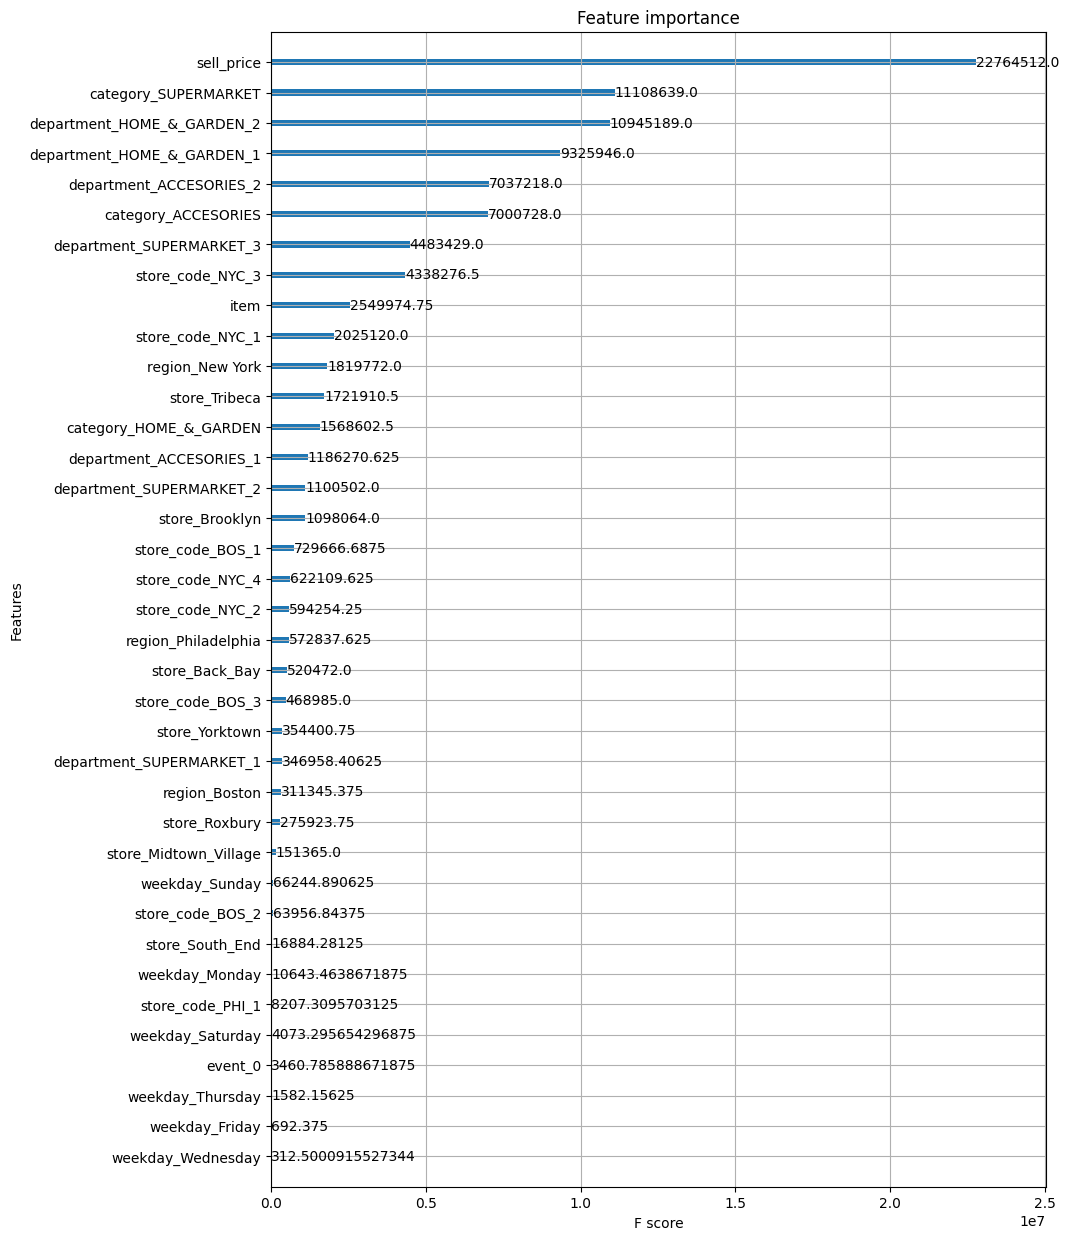

In [ ]:
importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax)

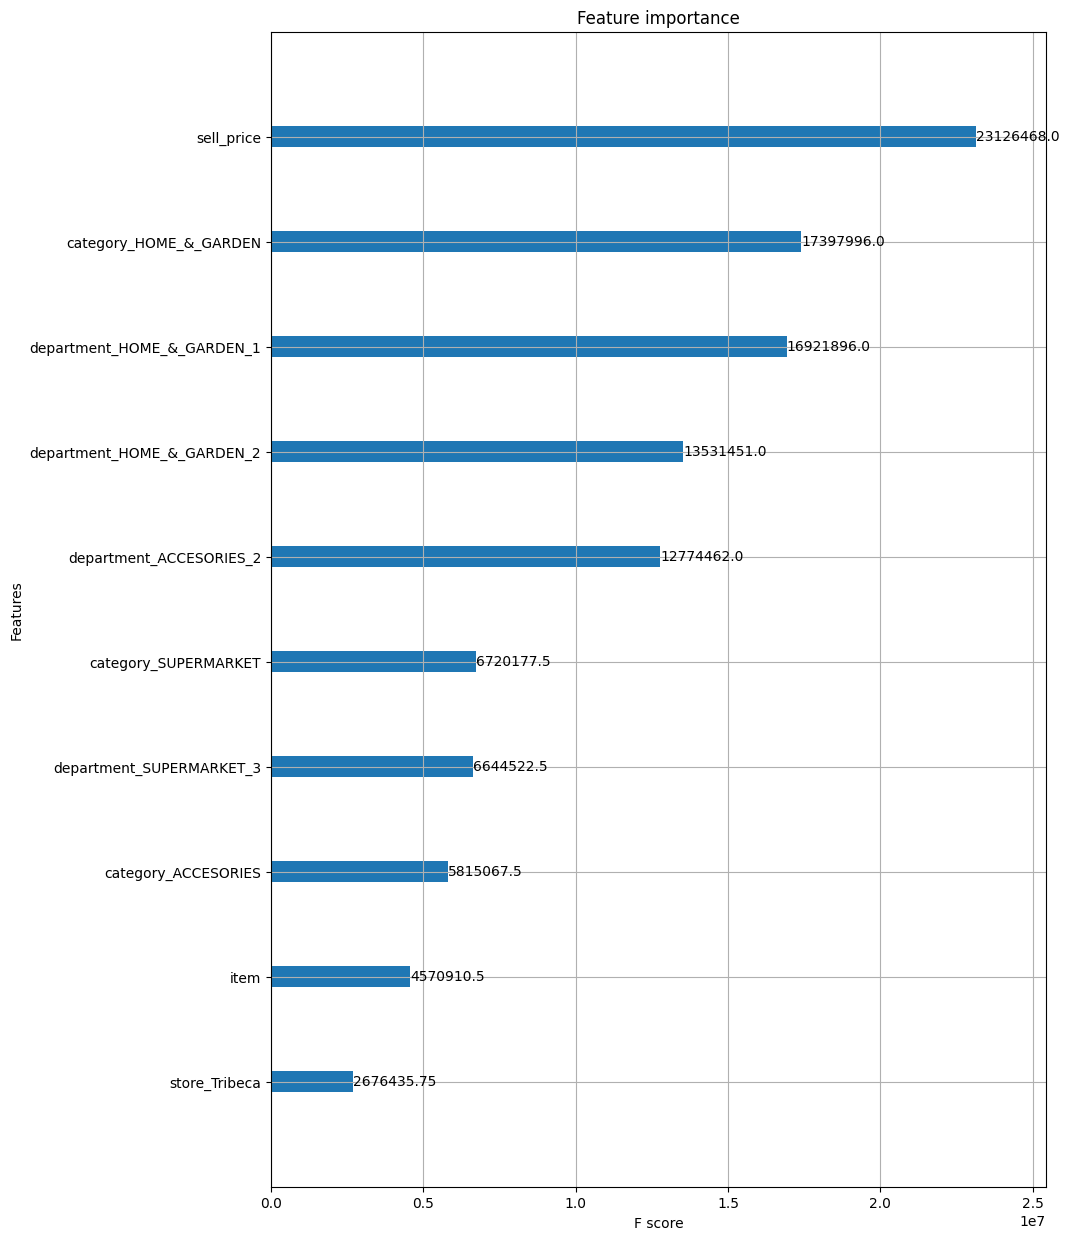

In [ ]:
importance = model.get_booster().get_score(importance_type = "gain")

# Convert the dictionary to a pandas DataFrame and sort by importance
importance_df = pd.DataFrame.from_dict(importance, orient='index', columns=['importance'])
importance_df = importance_df.sort_values(by=['importance'], ascending=False)

# Save the top 10 feature importances to a CSV file
top_n = 10
importance_df.iloc[:top_n].to_csv('feature_importances.csv')

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 15))
xgb.plot_importance(model, importance_type="gain", ax=ax, max_num_features=top_n)
plt.show()



In [ ]:
files.download('feature_importances.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
kfold = KFold(n_splits =10, shuffle =True)

List_scores= []

for train_idx, val_idx in kfold.split(X_train, y_train):
    # Split the data into training and test sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,early_stopping_rounds = 20,
                max_depth = 5, alpha = 10, n_estimators = 10)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)])
    
    # Make predictions on the test set
   # Make predictions on the test set
    y_pred = model.predict(X_val_fold)

    # Calculate the RMSE score for this fold and append it to the list
    rmse = np.sqrt(np.mean((y_val_fold - y_pred)**2))
    List_scores.append(rmse) 

    # Print the average RMSE score across all folds
    print('Average RMSE score: {:.2f}'.format(np.mean(List_scores)))


[0]	validation_0-rmse:32.99497
[1]	validation_0-rmse:31.51843
[2]	validation_0-rmse:30.26933
[3]	validation_0-rmse:29.58045
[4]	validation_0-rmse:28.97744
[5]	validation_0-rmse:28.51664
[6]	validation_0-rmse:28.13071
[7]	validation_0-rmse:27.46524
[8]	validation_0-rmse:27.18156
[9]	validation_0-rmse:26.95852
Average RMSE score: 26.96
[0]	validation_0-rmse:32.98370
[1]	validation_0-rmse:31.50604
[2]	validation_0-rmse:30.25701
[3]	validation_0-rmse:29.56591
[4]	validation_0-rmse:28.96181
[5]	validation_0-rmse:28.49884
[6]	validation_0-rmse:28.11093
[7]	validation_0-rmse:27.44312
[8]	validation_0-rmse:27.15829
[9]	validation_0-rmse:26.93403
Average RMSE score: 26.95
[0]	validation_0-rmse:32.84292
[1]	validation_0-rmse:31.37086
[2]	validation_0-rmse:30.12639
[3]	validation_0-rmse:29.43520
[4]	validation_0-rmse:28.82866
[5]	validation_0-rmse:28.36422
[6]	validation_0-rmse:27.97484
[7]	validation_0-rmse:27.31643
[8]	validation_0-rmse:27.03027
[9]	validation_0-rmse:26.80549
Average RMSE score

In [ ]:
Y_valida_pred = pd.DataFrame(model.predict(X_val), index= y_val.index, columns = ['predicted_sales'])

rmse_valida = np.sqrt(mean_squared_error(y_val, Y_valida_pred))
rmse_valida

30.287340081967333

In [ ]:
Y_valida_pred


,predicted_sales
id,
ACCESORIES_1_001_BOS_3,9.015162
ACCESORIES_1_002_BOS_3,9.309230
ACCESORIES_1_003_BOS_3,9.814273
ACCESORIES_1_004_BOS_3,9.309230
ACCESORIES_1_005_BOS_3,9.814273
...,...
SUPERMARKET_3_823_PHI_2,17.600235
SUPERMARKET_3_824_PHI_2,17.600235
SUPERMARKET_3_825_PHI_2,17.600235


In [ ]:
Y_valida_pred['predicted_sales'] = Y_valida_pred['predicted_sales'].astype(int)

In [ ]:
results = y_val.to_frame().join(Y_valida_pred)
results

,monthly_sales,predicted_sales
id,,
ACCESORIES_1_001_BOS_3,13,9
ACCESORIES_1_002_BOS_3,4,9
ACCESORIES_1_003_BOS_3,7,9
ACCESORIES_1_004_BOS_3,13,9
ACCESORIES_1_005_BOS_3,16,9
...,...,...
SUPERMARKET_3_823_PHI_2,5,17
SUPERMARKET_3_824_PHI_2,1,17
SUPERMARKET_3_825_PHI_2,40,17


In [ ]:
results['predicted_sales'].value_counts()

15    2531
14    2353
9     2235
16    2174
17    2155
8     2051
12    1826
13    1797
6     1768
19    1716
7     1585
18    1578
10    1057
11     988
20     866
22     494
24     466
23     377
21     363
5      233
25     166
26      65
28      37
27      25
Name: predicted_sales, dtype: int64

<Axes: xlabel='predicted_sales', ylabel='Density'>

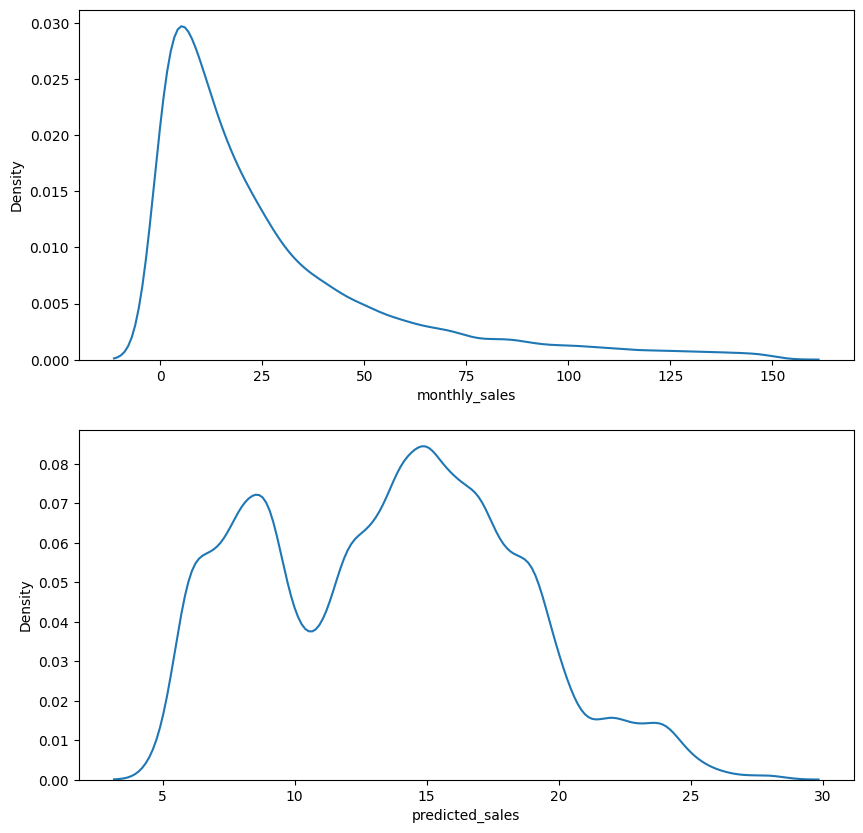

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1, ax2 = fig.subplots(2, 1)
sns.kdeplot(results['monthly_sales'], ax = ax1)
sns.kdeplot(results['predicted_sales'], ax = ax2)

In [ ]:
Y_test_pred = pd.DataFrame(model.predict(X_test), index= y_test.index, columns = ['predicted_sales'])
Y_test_pred

,predicted_sales
id,
ACCESORIES_1_001_BOS_3,9.015162
ACCESORIES_1_002_BOS_3,9.309230
ACCESORIES_1_003_BOS_3,9.814273
ACCESORIES_1_004_BOS_3,9.309230
ACCESORIES_1_005_BOS_3,9.814273
...,...
SUPERMARKET_3_823_PHI_2,17.600235
SUPERMARKET_3_824_PHI_2,17.600235
SUPERMARKET_3_825_PHI_2,17.600235


In [ ]:
Y_test_pred['predicted_sales'] = round(Y_test_pred['predicted_sales'],2)

In [ ]:
y_test

id
ACCESORIES_1_001_BOS_3      8
ACCESORIES_1_002_BOS_3      3
ACCESORIES_1_003_BOS_3      7
ACCESORIES_1_004_BOS_3     23
ACCESORIES_1_005_BOS_3     14
                           ..
SUPERMARKET_3_823_PHI_2     2
SUPERMARKET_3_824_PHI_2    17
SUPERMARKET_3_825_PHI_2    53
SUPERMARKET_3_826_PHI_2    32
SUPERMARKET_3_827_PHI_2    66
Name: monthly_sales, Length: 29345, dtype: int64

In [ ]:
results_1 = y_test.to_frame().join(Y_test_pred)

results_1.reset_index(inplace=True)


In [ ]:
results_1

,id,monthly_sales,predicted_sales
0,ACCESORIES_1_001_BOS_3,8,9.020000
1,ACCESORIES_1_002_BOS_3,3,9.310000
2,ACCESORIES_1_003_BOS_3,7,9.810000
3,ACCESORIES_1_004_BOS_3,23,9.310000
4,ACCESORIES_1_005_BOS_3,14,9.810000
...,...,...,...
29340,SUPERMARKET_3_823_PHI_2,2,17.600000
29341,SUPERMARKET_3_824_PHI_2,17,17.600000
29342,SUPERMARKET_3_825_PHI_2,53,17.600000
29343,SUPERMARKET_3_826_PHI_2,32,20.450001


In [ ]:
df_merge = df_item_sales[['id', 'category','item','department', 'store', 'region']]

In [ ]:
 prediction_analysis = pd.merge(df_merge, results_1, how= 'left', on='id')
 prediction_analysis

,id,category,item,department,store,region,monthly_sales,predicted_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES,ACCESORIES_1_001,ACCESORIES_1,Greenwich_Village,New York,26.0,10.170000
1,ACCESORIES_1_002_NYC_1,ACCESORIES,ACCESORIES_1_002,ACCESORIES_1,Greenwich_Village,New York,1.0,10.460000
2,ACCESORIES_1_003_NYC_1,ACCESORIES,ACCESORIES_1_003,ACCESORIES_1,Greenwich_Village,New York,16.0,10.970000
3,ACCESORIES_1_004_NYC_1,ACCESORIES,ACCESORIES_1_004,ACCESORIES_1,Greenwich_Village,New York,51.0,10.460000
4,ACCESORIES_1_005_NYC_1,ACCESORIES,ACCESORIES_1_005,ACCESORIES_1,Greenwich_Village,New York,29.0,10.970000
...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET,SUPERMARKET_3_823,SUPERMARKET_3,Queen_Village,Philadelphia,6.0,17.610001
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET,SUPERMARKET_3_824,SUPERMARKET_3,Queen_Village,Philadelphia,9.0,17.610001
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET,SUPERMARKET_3_825,SUPERMARKET_3,Queen_Village,Philadelphia,24.0,17.610001
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET,SUPERMARKET_3_826,SUPERMARKET_3,Queen_Village,Philadelphia,23.0,20.459999


In [ ]:
prediction_analysis['predicted_sales'].sum()

416519.62

In [ ]:
prediction_analysis.groupby('region')['monthly_sales'].sum()

region
Boston          183761.0
New York        305704.0
Philadelphia    208671.0
Name: monthly_sales, dtype: float64

In [ ]:
prediction_analysis.groupby('region')['predicted_sales'].sum()

region
Boston          120791.382812
New York        176330.437500
Philadelphia    119397.828125
Name: predicted_sales, dtype: float32

In [ ]:
prediction_analysis.groupby('category')['predicted_sales'].sum()

category
ACCESORIES        58608.160156
HOME_&_GARDEN    117695.078125
SUPERMARKET      240216.406250
Name: predicted_sales, dtype: float32

In [ ]:
prediction_analysis.groupby('store')['predicted_sales'].sum()

store
Back_Bay             39740.468750
Brooklyn             39517.398438
Greenwich_Village    43954.320312
Harlem               42586.710938
Midtown_Village      41198.441406
Queen_Village        40326.171875
Roxbury              41647.589844
South_End            39403.320312
Tribeca              50272.000000
Yorktown             37873.218750
Name: predicted_sales, dtype: float32

In [ ]:
prediction_analysis.groupby('item')['predicted_sales'].sum()

item
ACCESORIES_1_001      94.919998
ACCESORIES_1_002      98.059998
ACCESORIES_1_003     103.309998
ACCESORIES_1_004      85.650002
ACCESORIES_1_005     103.309998
                        ...    
SUPERMARKET_3_823    182.559998
SUPERMARKET_3_824    182.559998
SUPERMARKET_3_825    182.559998
SUPERMARKET_3_826    209.960007
SUPERMARKET_3_827    254.169998
Name: predicted_sales, Length: 3049, dtype: float32

In [ ]:
 prediction_analysis.to_csv('prediction_analysis.csv')
 files.download('prediction_analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prediction_analysis[prediction_analysis['predicted_sales']<0]

,id,item,department,store,region,monthly_sales,predicted_sales


In [ ]:
results_1['monthly_sales'].sum()

698136

In [ ]:
results_1['predicted_sales'].sum()

416519.66